In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S R
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

DATA_SOURCE_MAPPING = 'spotify-most-streamed-songs:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5660867%2F9341051%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241204%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241204T190336Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D528f9be8e12ddc651bf15aa7b8565088cc8bcfde51f3683efd51459c31742de9603747471c7f39e75aae0de3a4ff50ae2b0039bcbd64a74074abfca22b9bdf135902516d1853ce3ff80bd2ebec9b3831cd1f054c40a3e8ee221820d29a106e4c230f6cf686761ed35e67088eb35bce16ca04d6003fd1a0f1c6007b0412b418a44e45371c685d01351fc33587e58dd5467148673f67c35adc70d0be13b7a0dbd506392b8cafe49cb1c818f78f2c109a163176f0ae470211ee2d20695110ddc10c094a7fd45b2139ba30784a91c52262250c5b0295449699c5a0e8323a803935a061e4c667cd767e5c71daaf9a859aa18ecd6ef1533574f5c171b1df4a253fa652'

KAGGLE_INPUT_PATH = '/kaggle/input'
KAGGLE_WORKING_PATH = '/kaggle/working'

system(paste0('sudo umount ', '/kaggle/input'))
system(paste0('sudo rmdir ', '/kaggle/input'))
system(paste0('sudo mkdir -p -- ', KAGGLE_INPUT_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_INPUT_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_INPUT_PATH,' ',file.path('..', 'input')),
  intern=TRUE)

system(paste0('sudo mkdir -p -- ', KAGGLE_WORKING_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_WORKING_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_WORKING_PATH, ' ', file.path('..', 'working')),
  intern=TRUE)

data_source_mappings = strsplit(DATA_SOURCE_MAPPING, ',')[[1]]
for (data_source_mapping in data_source_mappings) {
    path_and_url = strsplit(data_source_mapping, ':')
    directory = path_and_url[[1]][1]
    download_url = URLdecode(path_and_url[[1]][2])
    filename = sub("\\?.+", "", download_url)
    destination_path = file.path(KAGGLE_INPUT_PATH, directory)
    print(paste0('Downloading and uncompressing: ', directory))
    if (endsWith(filename, '.zip')){
      temp = tempfile(fileext = '.zip')
      download.file(download_url, temp)
      unzip(temp, overwrite = TRUE, exdir = destination_path)
      unlink(temp)
    }
    else{
      temp = tempfile(fileext = '.tar')
      download.file(download_url, temp)
      untar(temp, exdir = destination_path)
      unlink(temp)
    }
    print(paste0('Downloaded and uncompressed: ', directory))
}

print(paste0('Data source import complete'))


character(0)

character(0)

character(0)

character(0)

character(0)

character(0)

[1] "Downloading and uncompressing: spotify-most-streamed-songs"
[1] "Downloaded and uncompressed: spotify-most-streamed-songs"
[1] "Data source import complete"


In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


character(0)

In [ ]:
df <- read.csv('../input/spotify-most-streamed-songs/Spotify Most Streamed Songs.csv')
print(str(df))

'data.frame':	953 obs. of  25 variables:
 $ track_name          : chr  "Seven (feat. Latto) (Explicit Ver.)" "LALA" "vampire" "Cruel Summer" ...
 $ artist.s._name      : chr  "Latto, Jung Kook" "Myke Towers" "Olivia Rodrigo" "Taylor Swift" ...
 $ artist_count        : int  2 1 1 1 1 2 2 1 1 2 ...
 $ released_year       : int  2023 2023 2023 2019 2023 2023 2023 2023 2023 2023 ...
 $ released_month      : int  7 3 6 8 5 6 3 7 5 3 ...
 $ released_day        : int  14 23 30 23 18 1 16 7 15 17 ...
 $ in_spotify_playlists: int  553 1474 1397 7858 3133 2186 3090 714 1096 2953 ...
 $ in_spotify_charts   : int  147 48 113 100 50 91 50 43 83 44 ...
 $ streams             : chr  "141381703" "133716286" "140003974" "800840817" ...
 $ in_apple_playlists  : int  43 48 94 116 84 67 34 25 60 49 ...
 $ in_apple_charts     : int  263 126 207 207 133 213 222 89 210 110 ...
 $ in_deezer_playlists : chr  "45" "58" "91" "125" ...
 $ in_deezer_charts    : int  10 14 14 12 15 17 13 13 11 13 ...
 $ in_shazam_c

We will drop cover url and any songs with missing data

In [ ]:
df <- subset(df, select = -cover_url)
df <- na.omit(df)
print(str(df))

'data.frame':	953 obs. of  24 variables:
 $ track_name          : chr  "Seven (feat. Latto) (Explicit Ver.)" "LALA" "vampire" "Cruel Summer" ...
 $ artist.s._name      : chr  "Latto, Jung Kook" "Myke Towers" "Olivia Rodrigo" "Taylor Swift" ...
 $ artist_count        : int  2 1 1 1 1 2 2 1 1 2 ...
 $ released_year       : int  2023 2023 2023 2019 2023 2023 2023 2023 2023 2023 ...
 $ released_month      : int  7 3 6 8 5 6 3 7 5 3 ...
 $ released_day        : int  14 23 30 23 18 1 16 7 15 17 ...
 $ in_spotify_playlists: int  553 1474 1397 7858 3133 2186 3090 714 1096 2953 ...
 $ in_spotify_charts   : int  147 48 113 100 50 91 50 43 83 44 ...
 $ streams             : chr  "141381703" "133716286" "140003974" "800840817" ...
 $ in_apple_playlists  : int  43 48 94 116 84 67 34 25 60 49 ...
 $ in_apple_charts     : int  263 126 207 207 133 213 222 89 210 110 ...
 $ in_deezer_playlists : chr  "45" "58" "91" "125" ...
 $ in_deezer_charts    : int  10 14 14 12 15 17 13 13 11 13 ...
 $ in_shazam_c

In [ ]:
# Add cleaner names

bad_names = c("artist.s._name","danceability_.","valence_.","energy_.","acousticness_.","instrumentalness_.","liveness_.","speechiness_.")
good_names = c("artist_name","danceability","valence","energy","acousticness","instrumentalness","liveness","speechiness")
# Use match to align names
names(df)[match(bad_names, names(df))] <- good_names

In [ ]:
names(df)

[1] "track_name"           "artist_name"          "artist_count"        
 [4] "released_year"        "released_month"       "released_day"        
 [7] "in_spotify_playlists" "in_spotify_charts"    "streams"             
[10] "in_apple_playlists"   "in_apple_charts"      "in_deezer_playlists" 
[13] "in_deezer_charts"     "in_shazam_charts"     "bpm"                 
[16] "key"                  "mode"                 "danceability"        
[19] "valence"              "energy"               "acousticness"        
[22] "instrumentalness"     "liveness"             "speechiness"

**Let's fix the data types**

First we will change categorical data to factors or dummy variables. We will also change numerical data that are 'chr' to 'int'. We will then normalize some numeric values.

The artist names and counts need to be deal with as well. Ideally we would like to represent each artisit as a a 1 hot-encoding vector, but some songs have multiple artists. It would misrepresent the data to turn a group of artists into a new variable, thus we will use 1-hot vectors for the artist category, with each artist being an entry column


In [ ]:
# Change chr to int where necessary
chr2int_cols = c("streams", "in_deezer_playlists", "in_shazam_charts")
df[chr2int_cols] <- lapply(df[chr2int_cols], as.integer)
str(df)

Warning message in lapply(df[chr2int_cols], as.integer):
“NAs introduced by coercion”
Warning message in lapply(df[chr2int_cols], as.integer):
“NAs introduced by coercion to integer range”
Warning message in lapply(df[chr2int_cols], as.integer):
“NAs introduced by coercion”
Warning message in lapply(df[chr2int_cols], as.integer):
“NAs introduced by coercion”


'data.frame':	953 obs. of  24 variables:
 $ track_name          : chr  "Seven (feat. Latto) (Explicit Ver.)" "LALA" "vampire" "Cruel Summer" ...
 $ artist_name         : chr  "Latto, Jung Kook" "Myke Towers" "Olivia Rodrigo" "Taylor Swift" ...
 $ artist_count        : int  2 1 1 1 1 2 2 1 1 2 ...
 $ released_year       : int  2023 2023 2023 2019 2023 2023 2023 2023 2023 2023 ...
 $ released_month      : int  7 3 6 8 5 6 3 7 5 3 ...
 $ released_day        : int  14 23 30 23 18 1 16 7 15 17 ...
 $ in_spotify_playlists: int  553 1474 1397 7858 3133 2186 3090 714 1096 2953 ...
 $ in_spotify_charts   : int  147 48 113 100 50 91 50 43 83 44 ...
 $ streams             : int  141381703 133716286 140003974 800840817 303236322 183706234 725980112 58149378 95217315 553634067 ...
 $ in_apple_playlists  : int  43 48 94 116 84 67 34 25 60 49 ...
 $ in_apple_charts     : int  263 126 207 207 133 213 222 89 210 110 ...
 $ in_deezer_playlists : int  45 58 91 125 87 88 43 30 48 66 ...
 $ in_deezer_chart

In [ ]:
#some nans appeared so we remove them
df <- na.omit(df)
str(df)

'data.frame':	826 obs. of  24 variables:
 $ track_name          : chr  "Seven (feat. Latto) (Explicit Ver.)" "LALA" "vampire" "Cruel Summer" ...
 $ artist_name         : chr  "Latto, Jung Kook" "Myke Towers" "Olivia Rodrigo" "Taylor Swift" ...
 $ artist_count        : int  2 1 1 1 1 2 2 1 1 2 ...
 $ released_year       : int  2023 2023 2023 2019 2023 2023 2023 2023 2023 2023 ...
 $ released_month      : int  7 3 6 8 5 6 3 7 5 3 ...
 $ released_day        : int  14 23 30 23 18 1 16 7 15 17 ...
 $ in_spotify_playlists: int  553 1474 1397 7858 3133 2186 3090 714 1096 2953 ...
 $ in_spotify_charts   : int  147 48 113 100 50 91 50 43 83 44 ...
 $ streams             : int  141381703 133716286 140003974 800840817 303236322 183706234 725980112 58149378 95217315 553634067 ...
 $ in_apple_playlists  : int  43 48 94 116 84 67 34 25 60 49 ...
 $ in_apple_charts     : int  263 126 207 207 133 213 222 89 210 110 ...
 $ in_deezer_playlists : int  45 58 91 125 87 88 43 30 48 66 ...
 $ in_deezer_chart

\\\\\**Splitting the data frame into multiple dataframes according to the categorization in the dataset**

In [ ]:
# track info are mainly labels, but we may be able to use these metrics for prediction (though its beyond the scope of the class)
track_info_df <-df[c("track_name","artist_name","artist_count","released_year","released_month","released_day")]
# Streaming metrics represent our predicted variables
metrics_df <-df[c("in_spotify_playlists","in_spotify_charts","streams","in_apple_playlists","in_apple_charts",
                 "in_deezer_playlists","in_deezer_charts","in_shazam_charts")]
# Musical Attributes are the explanatory variables
musical_attr_df <- df[c("bpm","key","mode","danceability","valence","energy","acousticness","instrumentalness","liveness","speechiness")]

**Minor tweaks of Musical attributes**

In [ ]:
min_max <- function(x) {
 (x - min(x))/(max(x) - min(x))
}

# Rescale BPM
musical_attr_df["bpm"] <- lapply(musical_attr_df["bpm"], min_max)

# Rescale Percent cols
percent_cols <- c("danceability","valence","energy","acousticness","instrumentalness","liveness","speechiness")
musical_attr_df[percent_cols] <- lapply(musical_attr_df[percent_cols], function(x) x/100)

# categorical data to factors
categorical_attr = c("key","mode")
musical_attr_df[categorical_attr] <- lapply(musical_attr_df[categorical_attr], as.factor)

str(musical_attr_df)

'data.frame':	826 obs. of  10 variables:
 $ bpm             : num  0.426 0.191 0.518 0.745 0.56 ...
 $ key             : Factor w/ 12 levels "","A","A#","B",..: 4 5 9 2 2 5 9 9 5 6 ...
 $ mode            : Factor w/ 2 levels "Major","Minor": 1 1 1 1 2 1 2 1 2 2 ...
 $ danceability    : num  0.8 0.71 0.51 0.55 0.65 0.92 0.67 0.67 0.85 0.81 ...
 $ valence         : num  0.89 0.61 0.32 0.58 0.23 0.66 0.83 0.26 0.22 0.56 ...
 $ energy          : num  0.83 0.74 0.53 0.72 0.8 0.58 0.76 0.71 0.62 0.48 ...
 $ acousticness    : num  0.31 0.07 0.17 0.11 0.14 0.19 0.48 0.37 0.12 0.21 ...
 $ instrumentalness: num  0 0 0 0 0.63 0 0 0 0 0 ...
 $ liveness        : num  0.08 0.1 0.31 0.11 0.11 0.08 0.08 0.11 0.28 0.08 ...
 $ speechiness     : num  0.04 0.04 0.06 0.15 0.06 0.24 0.03 0.04 0.09 0.33 ...


#### Explanatory Data Analysis

In [ ]:
# Distribution plots
numeric_col <- sapply(musical_attr_df, is.numeric)
categorical_col <- !numeric_col

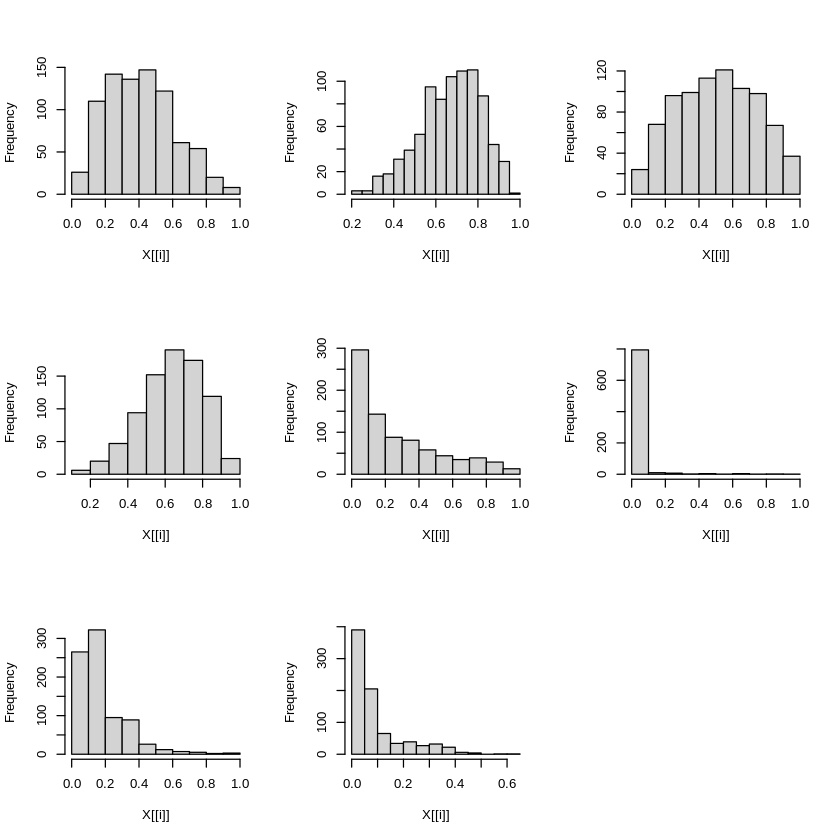

In [ ]:
par(mfrow=c(3,3))  # Adjust grid layout based on number of columns
hist_outputs = lapply(musical_attr_df[numeric_col], hist, main="", xlab=)

In [ ]:
library(ggplot2)

# Function to create and save histogram
plot_hist <- function(data, colname) {
 p <- ggplot(data.frame(x=data), aes(x=x)) +
   geom_histogram() +
   labs(x=colname, y="Frequency") +
   theme(axis.title = element_text(size=32, face = "bold"), axis.text = element_text(size=24))

 ggsave(paste0(colname, "_hist.png"), p)
}

lapply(names(musical_attr_df[numeric_col]), function(col) {
 plot_hist(musical_attr_df[[col]], col)
})

Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


[[1]]
[1] "bpm_hist.png"

[[2]]
[1] "danceability_hist.png"

[[3]]
[1] "valence_hist.png"

[[4]]
[1] "energy_hist.png"

[[5]]
[1] "acousticness_hist.png"

[[6]]
[1] "instrumentalness_hist.png"

[[7]]
[1] "liveness_hist.png"

[[8]]
[1] "speechiness_hist.png"

In [ ]:
system("apt-get update")
system("apt-get install -y libmagick++-dev")

In [ ]:
# Install if it's your first time to run
install.packages("magick")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#### Create display images function

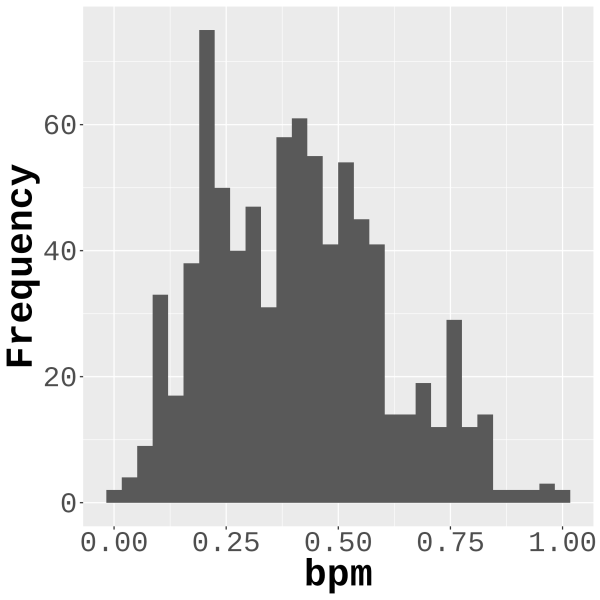

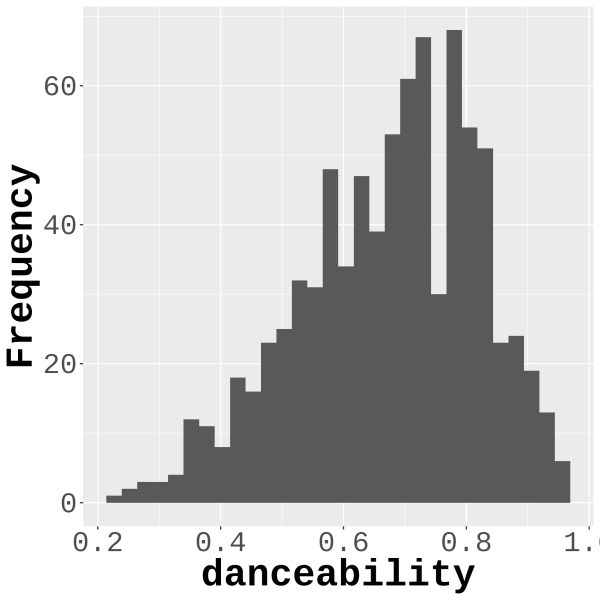

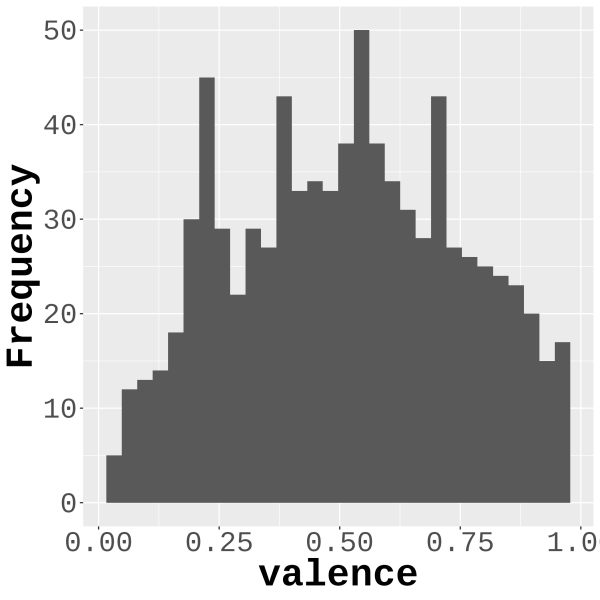

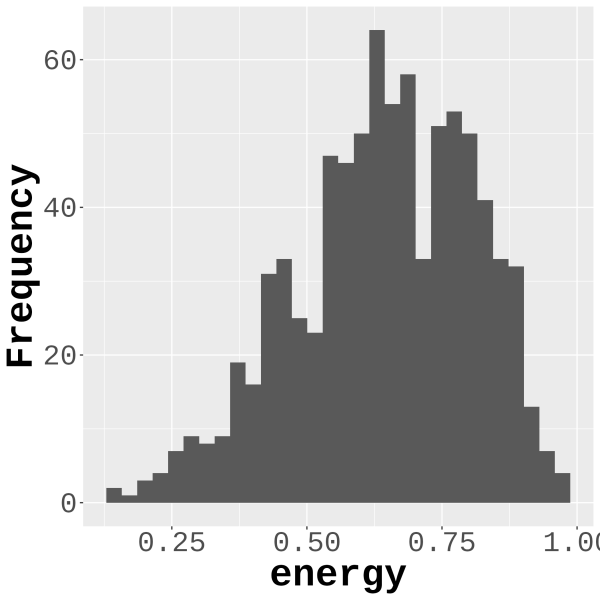

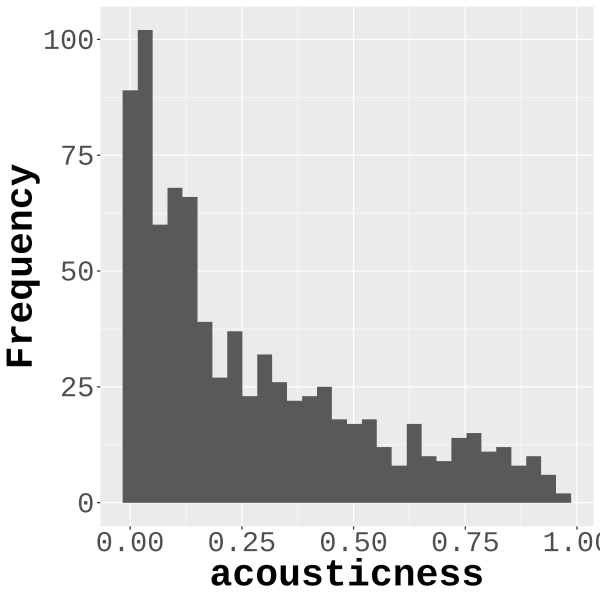

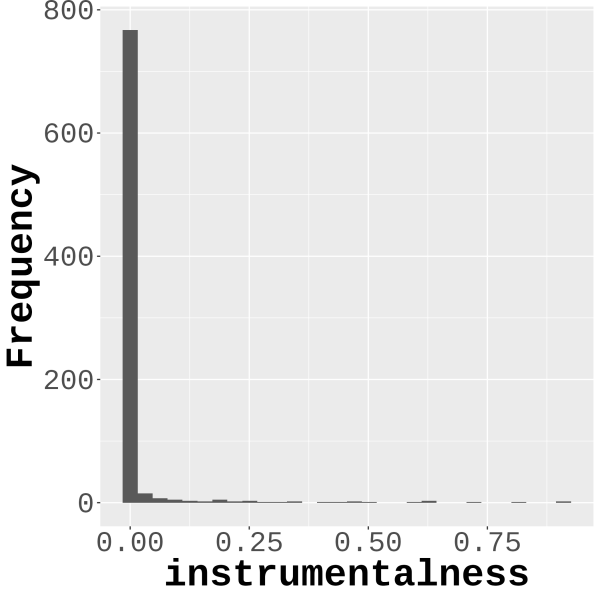

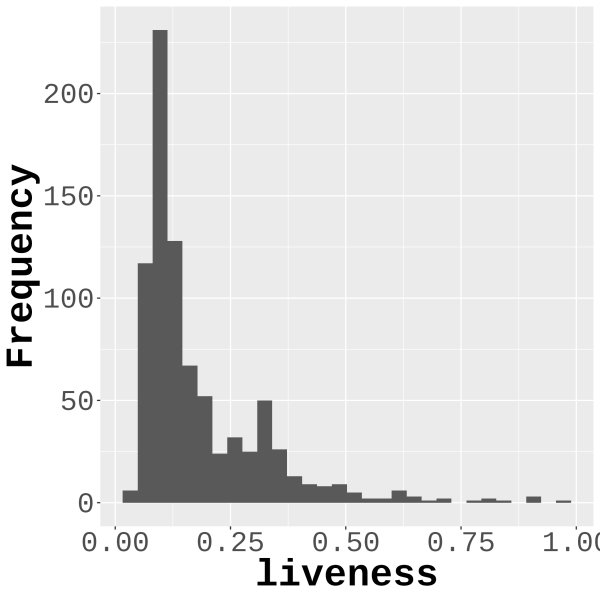

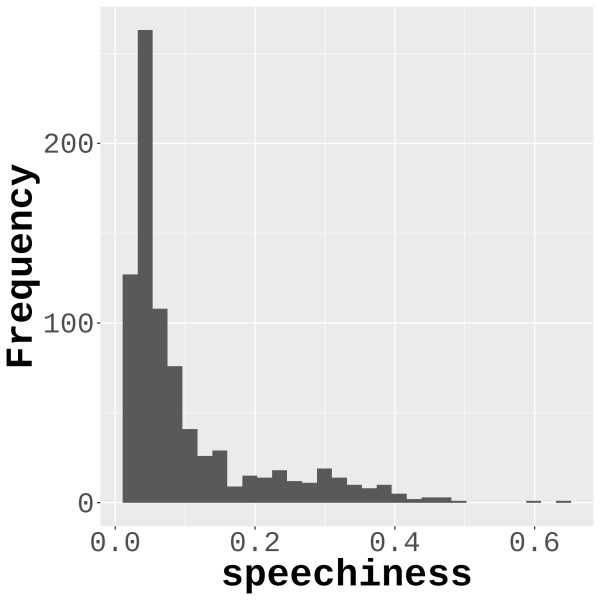

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      600    600 sRGB       FALSE        0 118x118
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      600    600 sRGB       FALSE        0 118x118
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      600    600 sRGB       FALSE        0 118x118
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      600    600 sRGB       FALSE        0 118x118
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      600    600 sRGB       FALSE        0 118x118
# A tibble: 1 × 7
  format width height colorspace matte filesize dens

In [ ]:
library(magick)

display_images <- function(col_names, img_suffix, size){
  for(col in col_names) {
    img <- image_read(paste0(col, img_suffix))
    img_resized <- image_scale(img, size)
    print(img_resized)}
}

display_images(names(musical_attr_df)[numeric_col], "_hist.png", "800x600")

**Kernel Density Estimation - using gaussian Kernel**

In [ ]:
plot_density <- function(data, colname) {
 p <- ggplot(data.frame(x=data), aes(x=x)) +
   geom_density(adjust = 0.75) +
   labs(x=colname, y="Density") +
   theme(axis.title = element_text(size=32, face = "bold"), axis.text = element_text(size=24)
 )

 ggsave(paste0(colname, "_density.png"), p)
}

numeric_cols <- sapply(musical_attr_df, is.numeric)
lapply(names(musical_attr_df[numeric_col]), function(col) {
 plot_density(musical_attr_df[[col]], col)
})



Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image


[[1]]
[1] "bpm_density.png"

[[2]]
[1] "danceability_density.png"

[[3]]
[1] "valence_density.png"

[[4]]
[1] "energy_density.png"

[[5]]
[1] "acousticness_density.png"

[[6]]
[1] "instrumentalness_density.png"

[[7]]
[1] "liveness_density.png"

[[8]]
[1] "speechiness_density.png"

[[9]]
[1] "log1p_acousticness_density.png"

[[10]]
[1] "log1p_speechiness_density.png"

[[11]]
[1] "sqrt_acousticness_density.png"

[[12]]
[1] "sqrt_instrumentalness_density.png"

[[13]]
[1] "sqrt_liveness_density.png"

[[14]]
[1] "sqrt_speechiness_density.png"

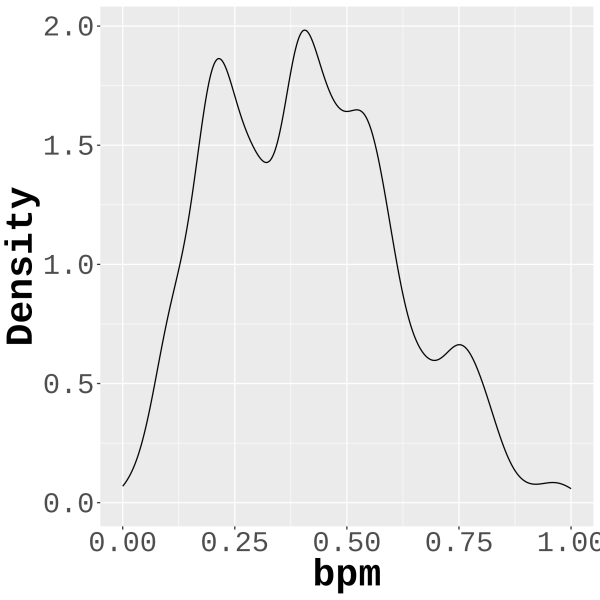

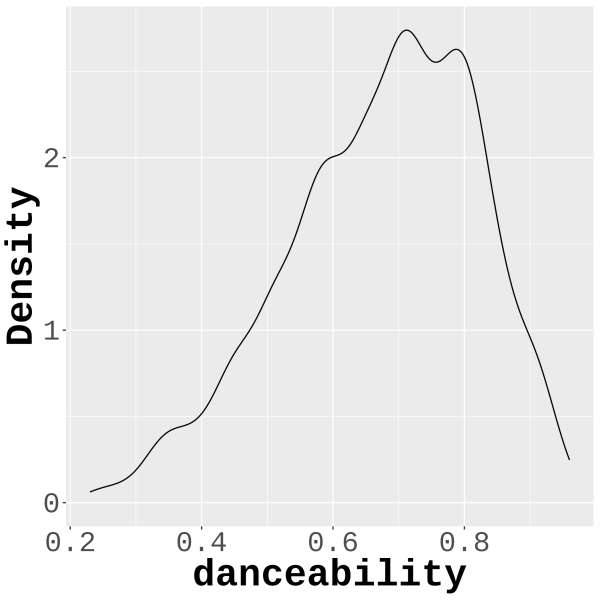

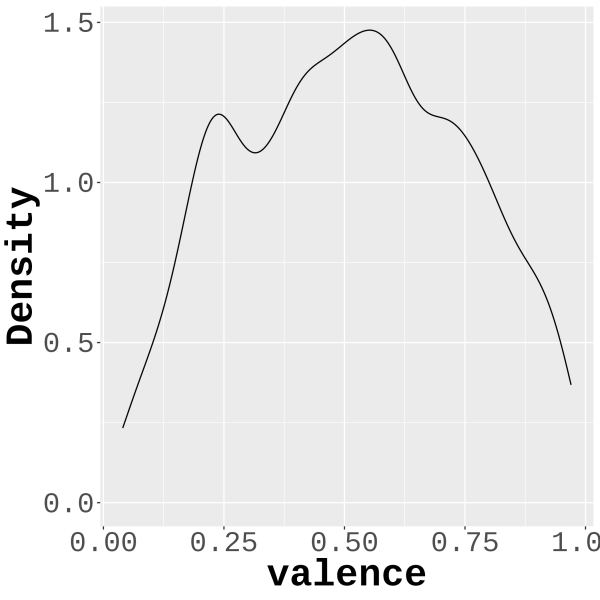

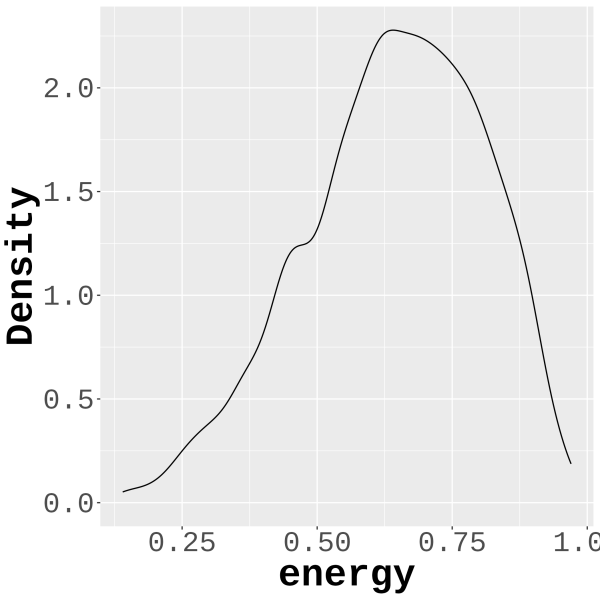

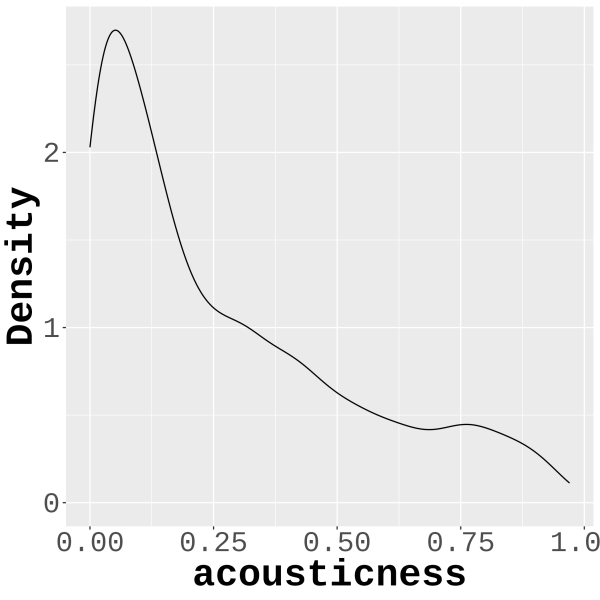

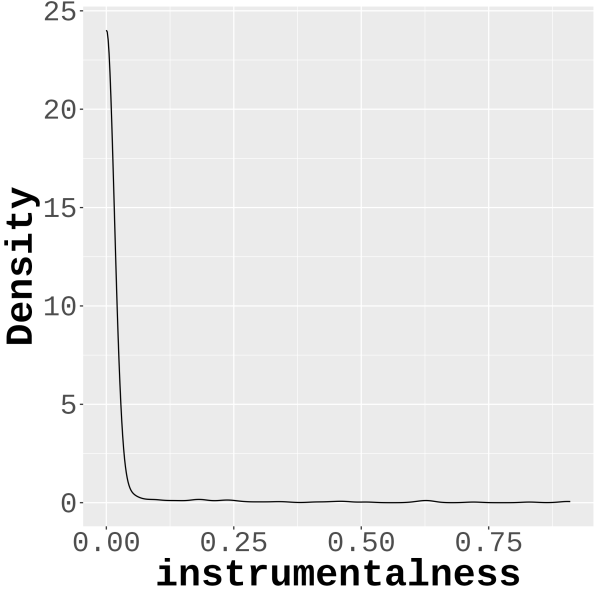

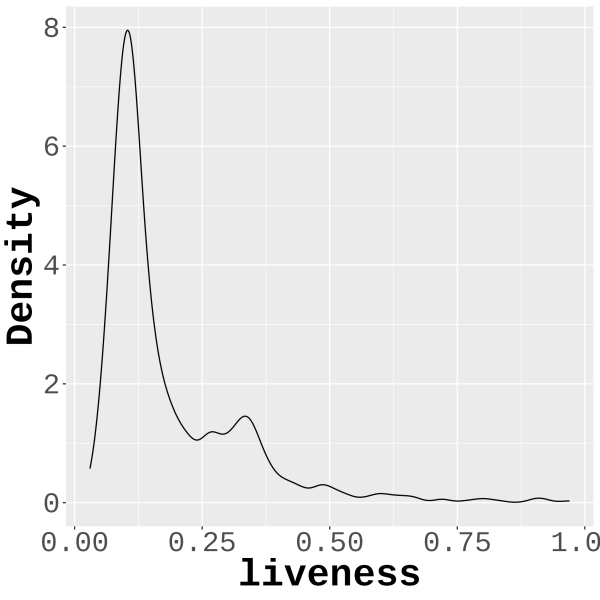

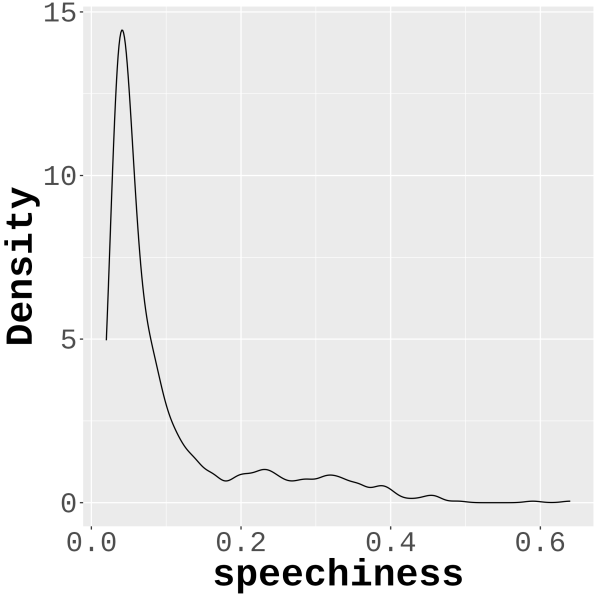

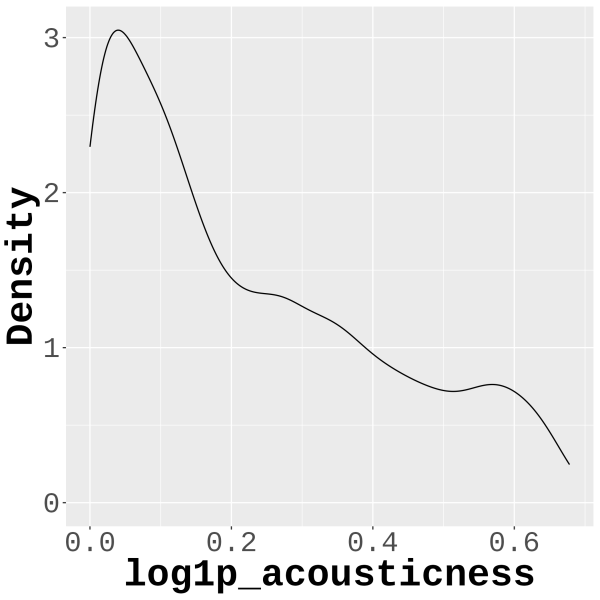

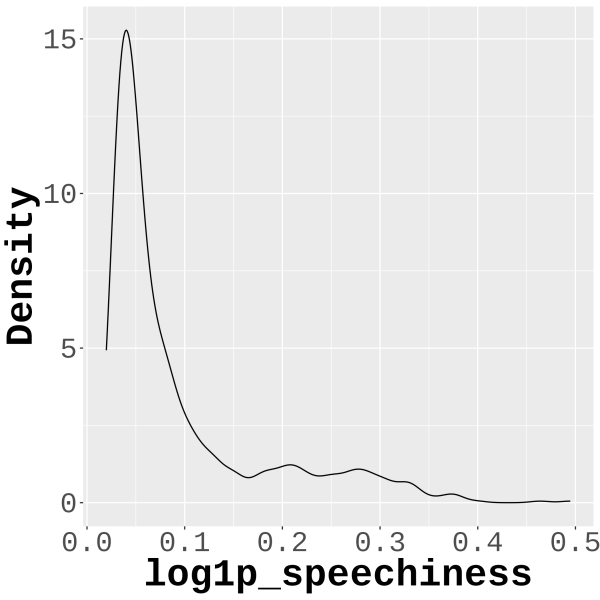

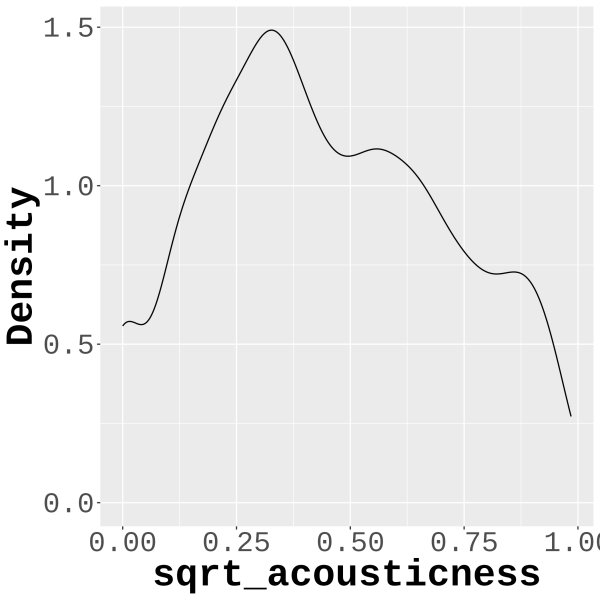

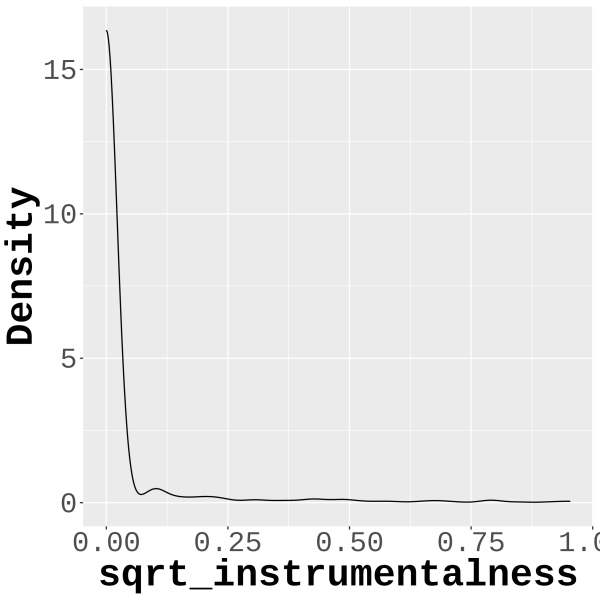

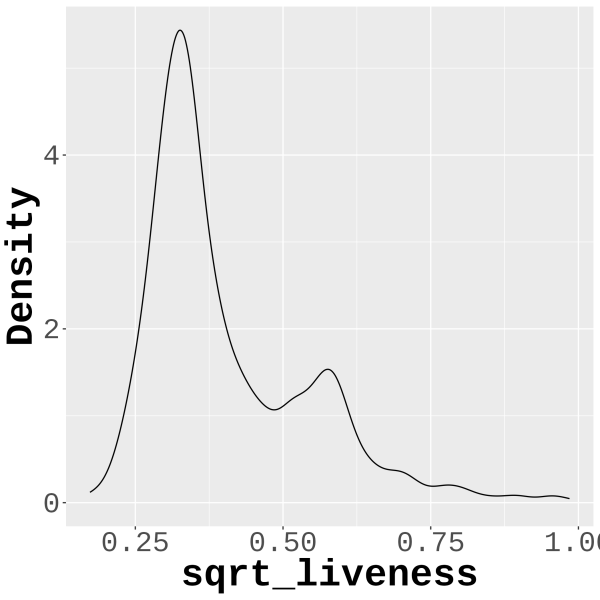

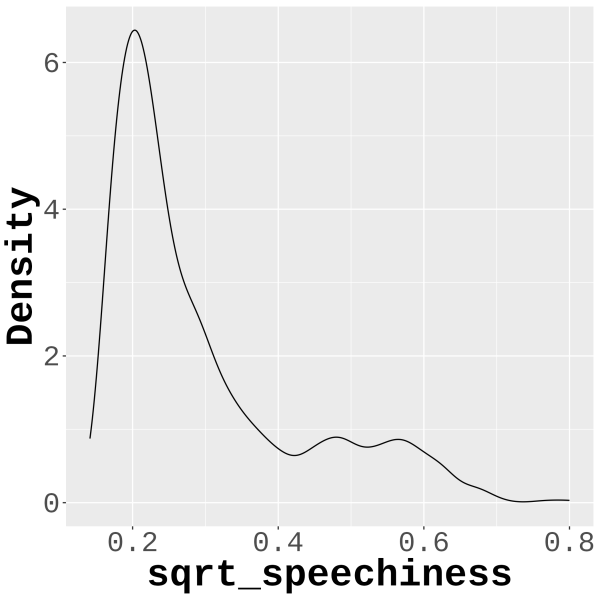

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      600    600 sRGB       FALSE        0 118x118
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      600    600 sRGB       FALSE        0 118x118
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      600    600 sRGB       FALSE        0 118x118
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      600    600 sRGB       FALSE        0 118x118
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      600    600 sRGB       FALSE        0 118x118
# A tibble: 1 × 7
  format width height colorspace matte filesize dens

In [ ]:
# Display

display_images(names(musical_attr_df)[numeric_col], "_density.png", "800x600")


Explore negative log(x+1) probs of the following:
* Acousticness
* Instrumentalness
* Liveness
* Speechiness

In [ ]:
skewed_cols = c("acousticness","instrumentalness","liveness","speechiness")
logp_cols = paste0("log1p_", skewed_cols)
musical_attr_df[logp_cols ] <- lapply(musical_attr_df[skewed_cols], function(x) log(x+1))
str(musical_attr_df)

'data.frame':	826 obs. of  18 variables:
 $ bpm                   : num  0.426 0.191 0.518 0.745 0.56 ...
 $ key                   : Factor w/ 12 levels "","A","A#","B",..: 4 5 9 2 2 5 9 9 5 6 ...
 $ mode                  : Factor w/ 2 levels "Major","Minor": 1 1 1 1 2 1 2 1 2 2 ...
 $ danceability          : num  0.8 0.71 0.51 0.55 0.65 0.92 0.67 0.67 0.85 0.81 ...
 $ valence               : num  0.89 0.61 0.32 0.58 0.23 0.66 0.83 0.26 0.22 0.56 ...
 $ energy                : num  0.83 0.74 0.53 0.72 0.8 0.58 0.76 0.71 0.62 0.48 ...
 $ acousticness          : num  0.31 0.07 0.17 0.11 0.14 0.19 0.48 0.37 0.12 0.21 ...
 $ instrumentalness      : num  0 0 0 0 0.63 0 0 0 0 0 ...
 $ liveness              : num  0.08 0.1 0.31 0.11 0.11 0.08 0.08 0.11 0.28 0.08 ...
 $ speechiness           : num  0.04 0.04 0.06 0.15 0.06 0.24 0.03 0.04 0.09 0.33 ...
 $ log1p_acousticness    : num  0.27 0.0677 0.157 0.1044 0.131 ...
 $ log1p_instrumentalness: num  0 0 0 0 0.489 ...
 $ log1p_liveness        : 

In [ ]:
#histograms and pdfs of the transformed entries
lapply(names(musical_attr_df[logp_cols]), function(col) {
 plot_hist(musical_attr_df[[col]], col)
})
lapply(names(musical_attr_df[logp_cols]), function(col) {
 plot_density(musical_attr_df[[col]], col)
})

Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


[[1]]
[1] "log1p_acousticness_hist.png"

[[2]]
[1] "log1p_instrumentalness_hist.png"

[[3]]
[1] "log1p_liveness_hist.png"

[[4]]
[1] "log1p_speechiness_hist.png"

Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image


[[1]]
[1] "log1p_acousticness_density.png"

[[2]]
[1] "log1p_instrumentalness_density.png"

[[3]]
[1] "log1p_liveness_density.png"

[[4]]
[1] "log1p_speechiness_density.png"

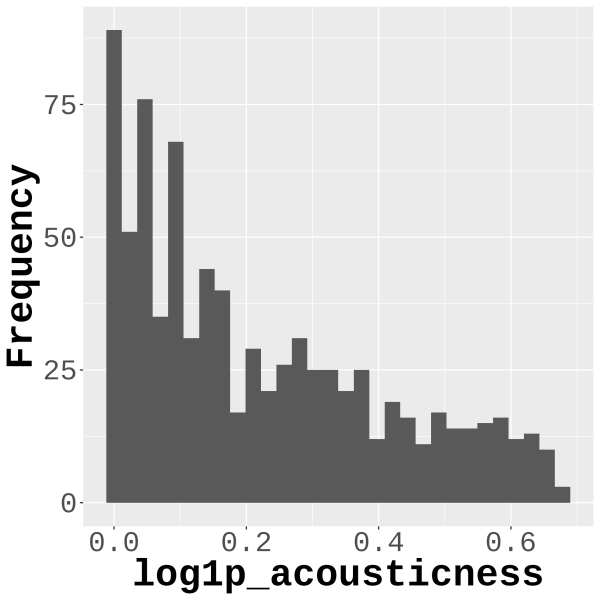

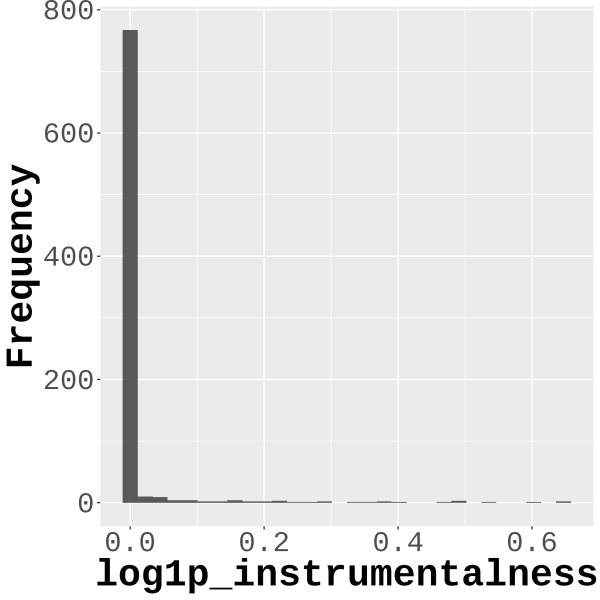

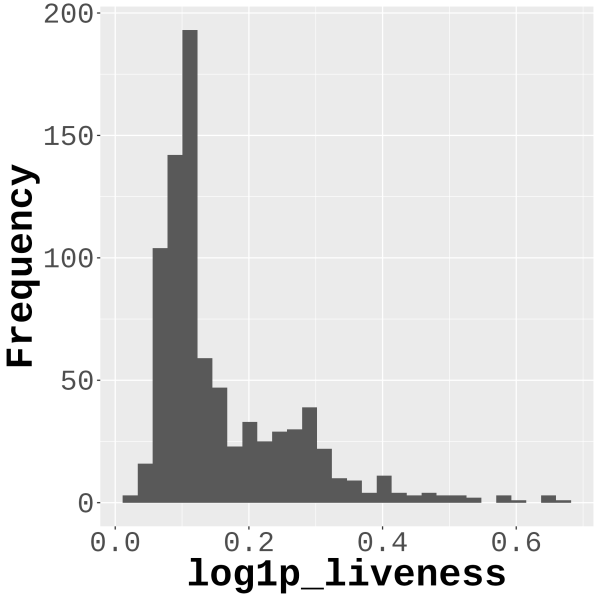

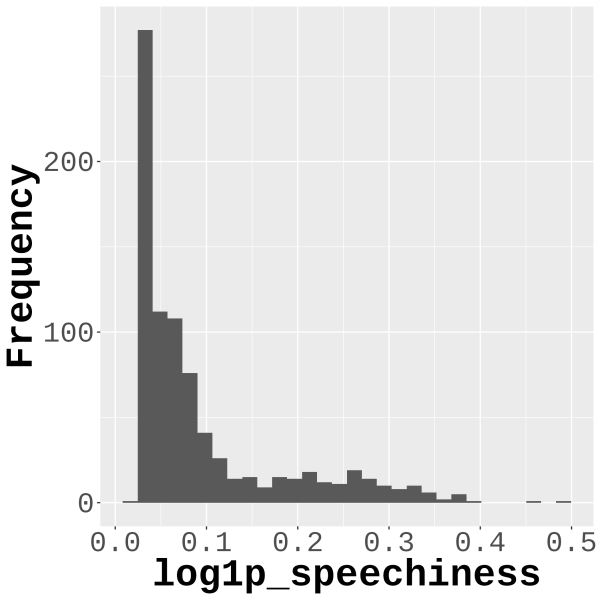

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      600    600 sRGB       FALSE        0 118x118
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      600    600 sRGB       FALSE        0 118x118
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      600    600 sRGB       FALSE        0 118x118
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      600    600 sRGB       FALSE        0 118x118


In [ ]:
#display histograms
display_images(names(musical_attr_df[logp_cols]), "_hist.png","800x600" )

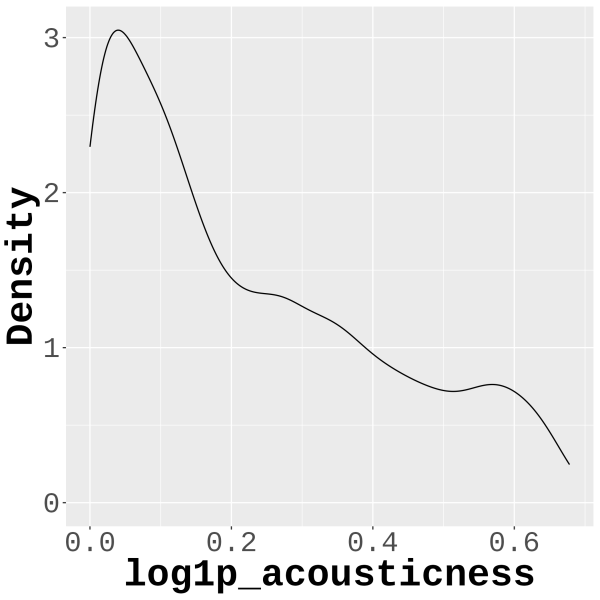

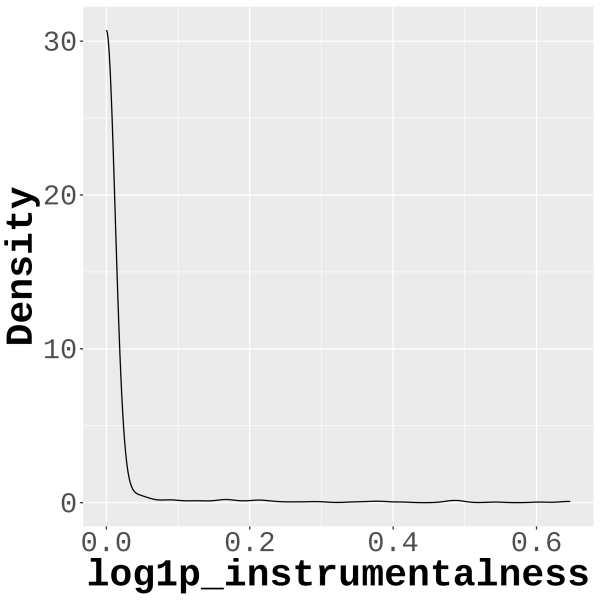

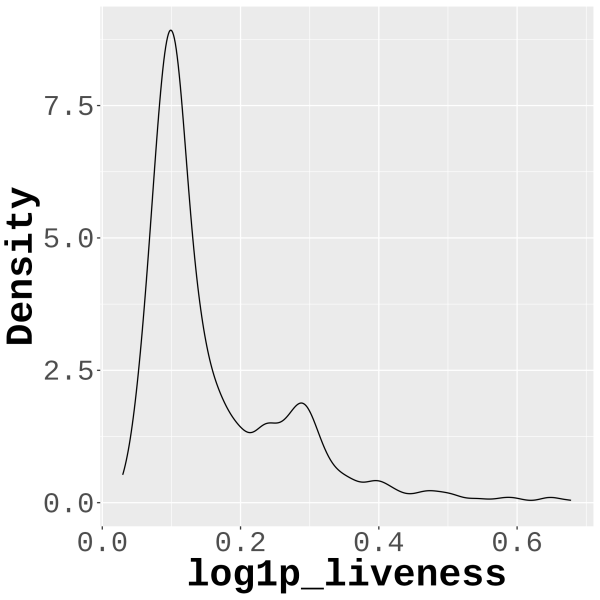

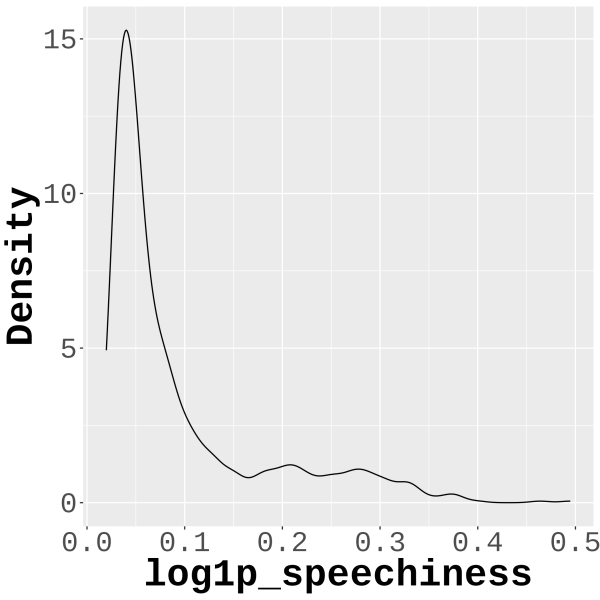

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      600    600 sRGB       FALSE        0 118x118
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      600    600 sRGB       FALSE        0 118x118
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      600    600 sRGB       FALSE        0 118x118
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      600    600 sRGB       FALSE        0 118x118


In [ ]:
#display density
display_images(names(musical_attr_df[logp_cols]), "_density.png","800x600" )

#### let's look at square roots

In [ ]:
sqrt_cols = paste0("sqrt_", skewed_cols)
musical_attr_df[sqrt_cols ] <- lapply(musical_attr_df[skewed_cols], function(x) sqrt(x))
str(musical_attr_df)

'data.frame':	826 obs. of  18 variables:
 $ bpm                   : num  0.426 0.191 0.518 0.745 0.56 ...
 $ key                   : Factor w/ 12 levels "","A","A#","B",..: 4 5 9 2 2 5 9 9 5 6 ...
 $ mode                  : Factor w/ 2 levels "Major","Minor": 1 1 1 1 2 1 2 1 2 2 ...
 $ danceability          : num  0.8 0.71 0.51 0.55 0.65 0.92 0.67 0.67 0.85 0.81 ...
 $ valence               : num  0.89 0.61 0.32 0.58 0.23 0.66 0.83 0.26 0.22 0.56 ...
 $ energy                : num  0.83 0.74 0.53 0.72 0.8 0.58 0.76 0.71 0.62 0.48 ...
 $ acousticness          : num  0.31 0.07 0.17 0.11 0.14 0.19 0.48 0.37 0.12 0.21 ...
 $ instrumentalness      : num  0 0 0 0 0.63 0 0 0 0 0 ...
 $ liveness              : num  0.08 0.1 0.31 0.11 0.11 0.08 0.08 0.11 0.28 0.08 ...
 $ speechiness           : num  0.04 0.04 0.06 0.15 0.06 0.24 0.03 0.04 0.09 0.33 ...
 $ log1p_acousticness    : num  0.27 0.0677 0.157 0.1044 0.131 ...
 $ log1p_instrumentalness: num  0 0 0 0 0.489 ...
 $ log1p_liveness        : 

In [ ]:
#histograms and pdfs of the transformed entries
lapply(names(musical_attr_df[sqrt_cols]), function(col) {
 plot_hist(musical_attr_df[[col]], col)
})
lapply(names(musical_attr_df[sqrt_cols]), function(col) {
 plot_density(musical_attr_df[[col]], col)
})

Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


[[1]]
[1] "sqrt_acousticness_hist.png"

[[2]]
[1] "sqrt_instrumentalness_hist.png"

[[3]]
[1] "sqrt_liveness_hist.png"

[[4]]
[1] "sqrt_speechiness_hist.png"

Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image


[[1]]
[1] "sqrt_acousticness_density.png"

[[2]]
[1] "sqrt_instrumentalness_density.png"

[[3]]
[1] "sqrt_liveness_density.png"

[[4]]
[1] "sqrt_speechiness_density.png"

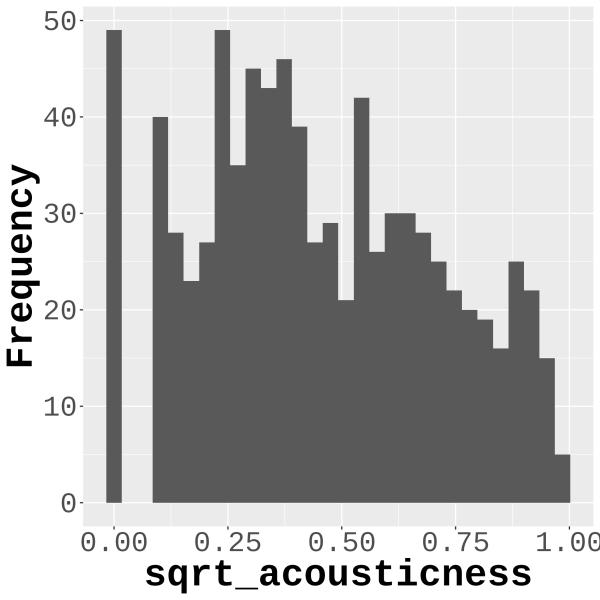

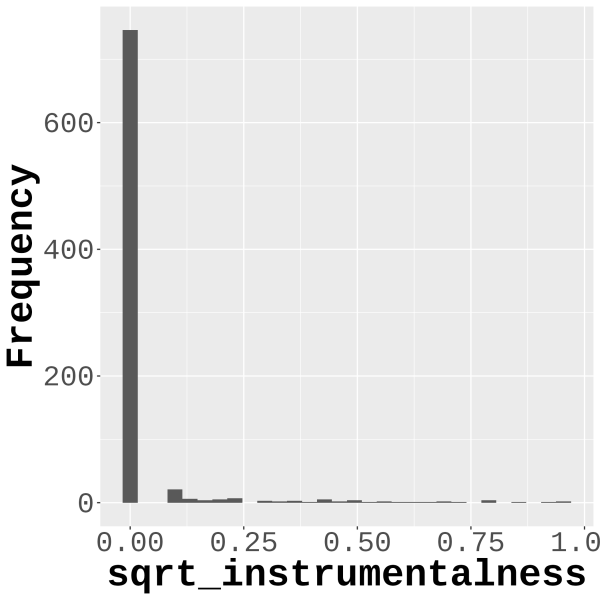

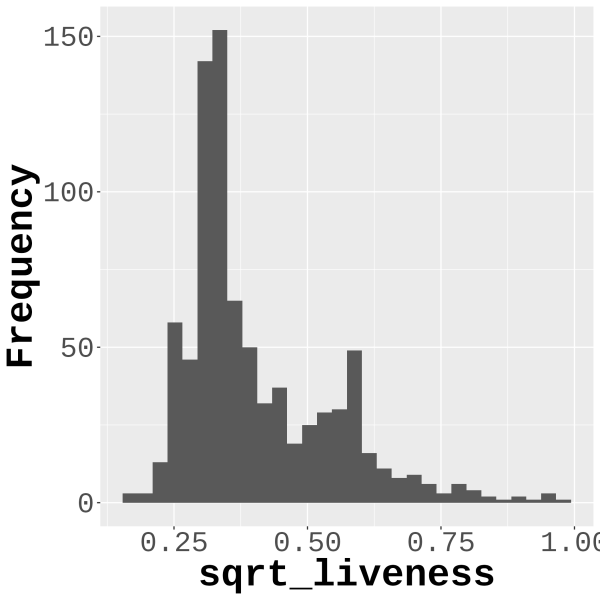

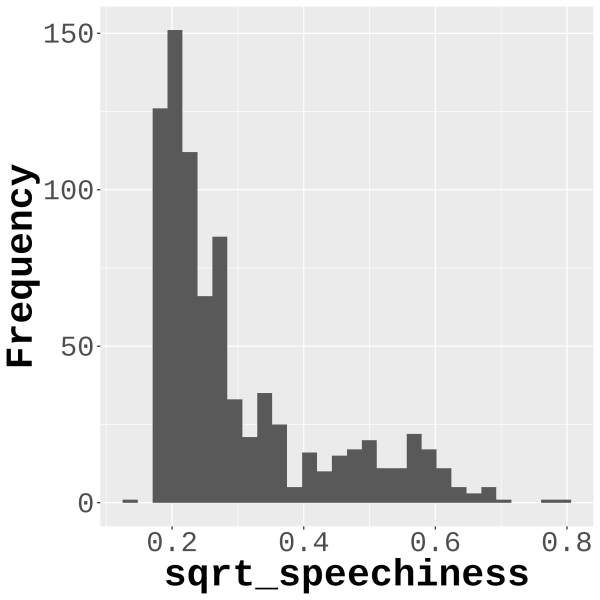

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      600    600 sRGB       FALSE        0 118x118
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      600    600 sRGB       FALSE        0 118x118
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      600    600 sRGB       FALSE        0 118x118
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      600    600 sRGB       FALSE        0 118x118


In [ ]:
#display histograms
display_images(names(musical_attr_df[sqrt_cols]), "_hist.png","800x600" )

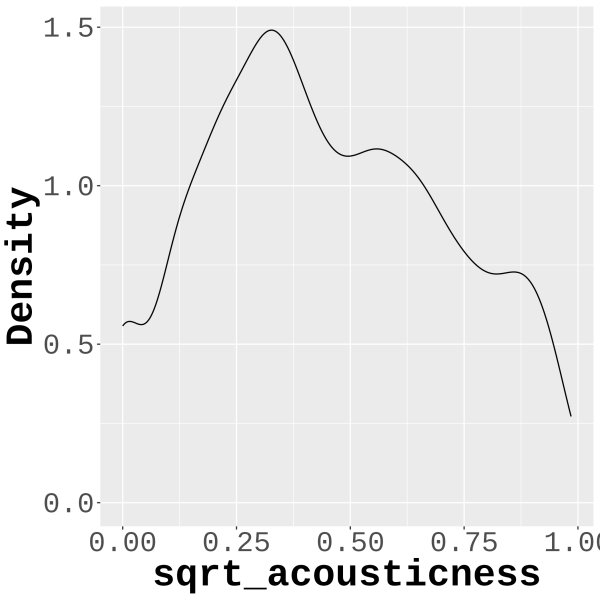

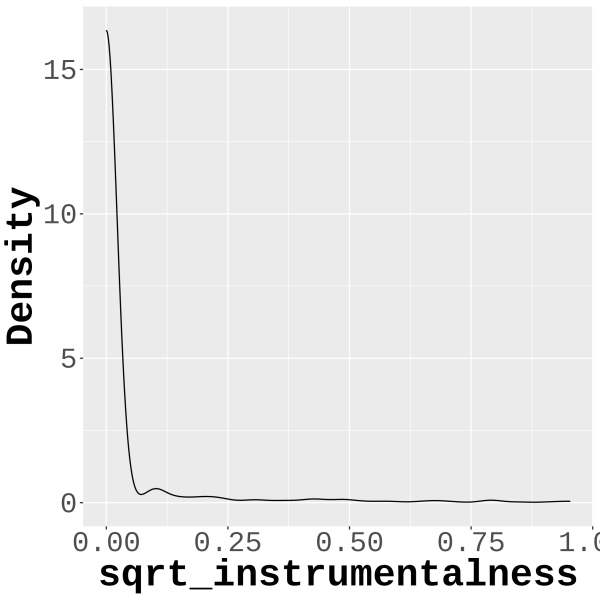

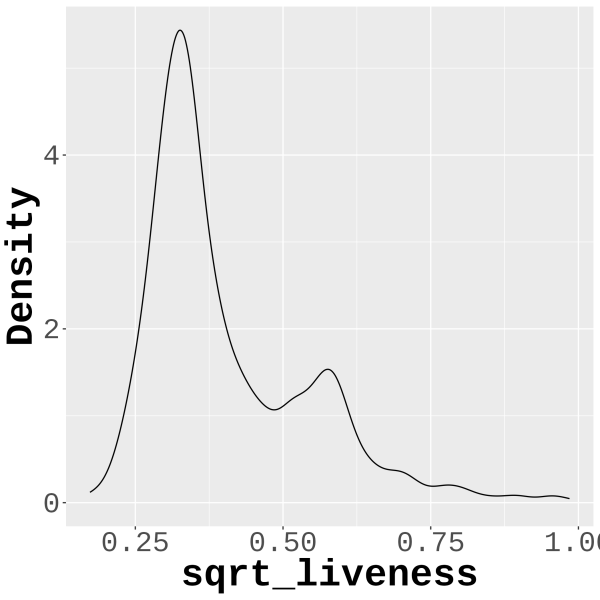

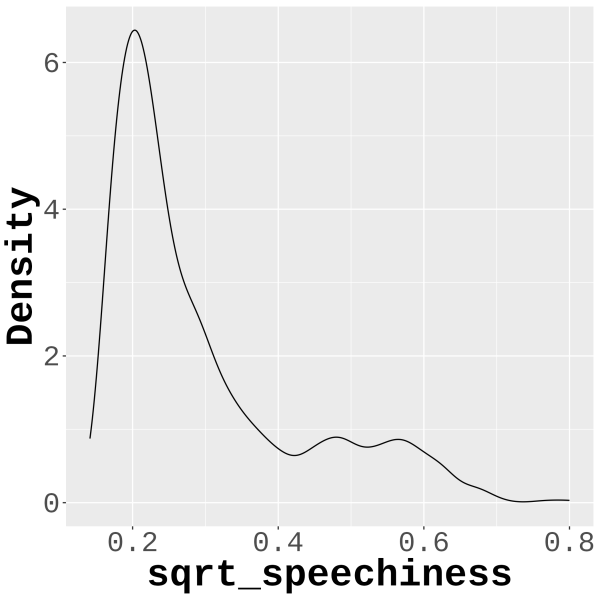

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      600    600 sRGB       FALSE        0 118x118
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      600    600 sRGB       FALSE        0 118x118
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      600    600 sRGB       FALSE        0 118x118
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      600    600 sRGB       FALSE        0 118x118


In [ ]:
#display histograms
display_images(names(musical_attr_df[sqrt_cols]), "_density.png","800x600" )

 Prefer to use sqrt than log for these feature, except for instrumentalness this will be binarized.

 True -> instumentals present. False -> not present

In [ ]:
musical_attr_df["instrumental"] <- as.factor(musical_attr_df$instrumentalness > 0)
str(musical_attr_df)

'data.frame':	826 obs. of  19 variables:
 $ bpm                   : num  0.426 0.191 0.518 0.745 0.56 ...
 $ key                   : Factor w/ 12 levels "","A","A#","B",..: 4 5 9 2 2 5 9 9 5 6 ...
 $ mode                  : Factor w/ 2 levels "Major","Minor": 1 1 1 1 2 1 2 1 2 2 ...
 $ danceability          : num  0.8 0.71 0.51 0.55 0.65 0.92 0.67 0.67 0.85 0.81 ...
 $ valence               : num  0.89 0.61 0.32 0.58 0.23 0.66 0.83 0.26 0.22 0.56 ...
 $ energy                : num  0.83 0.74 0.53 0.72 0.8 0.58 0.76 0.71 0.62 0.48 ...
 $ acousticness          : num  0.31 0.07 0.17 0.11 0.14 0.19 0.48 0.37 0.12 0.21 ...
 $ instrumentalness      : num  0 0 0 0 0.63 0 0 0 0 0 ...
 $ liveness              : num  0.08 0.1 0.31 0.11 0.11 0.08 0.08 0.11 0.28 0.08 ...
 $ speechiness           : num  0.04 0.04 0.06 0.15 0.06 0.24 0.03 0.04 0.09 0.33 ...
 $ log1p_acousticness    : num  0.27 0.0677 0.157 0.1044 0.131 ...
 $ log1p_instrumentalness: num  0 0 0 0 0.489 ...
 $ log1p_liveness        : 

### for categorical data we will generate the bar plots to look at their proportions

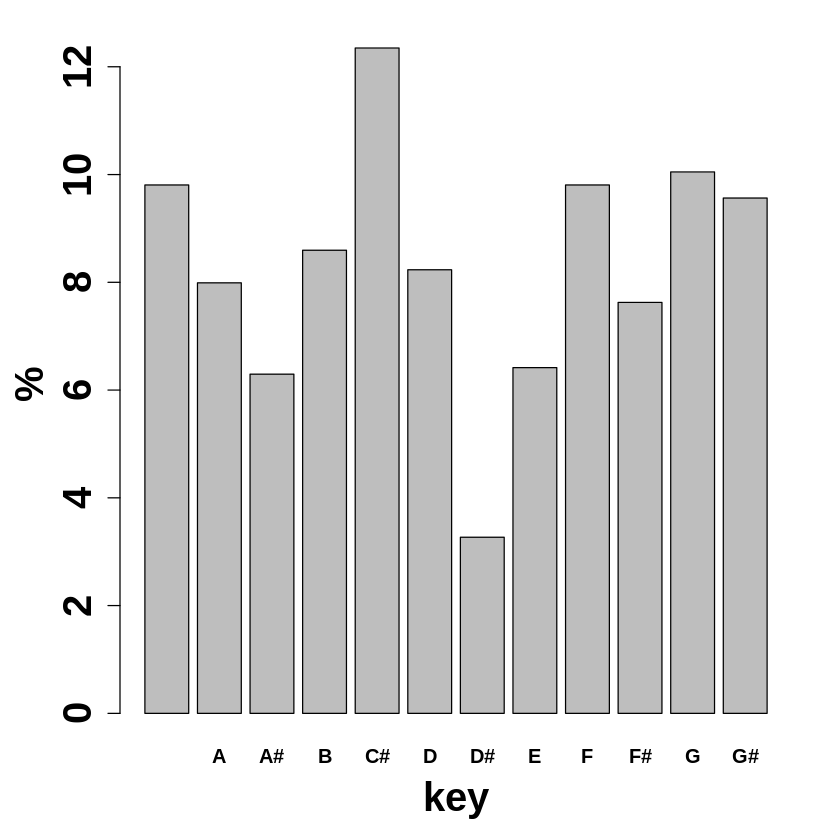

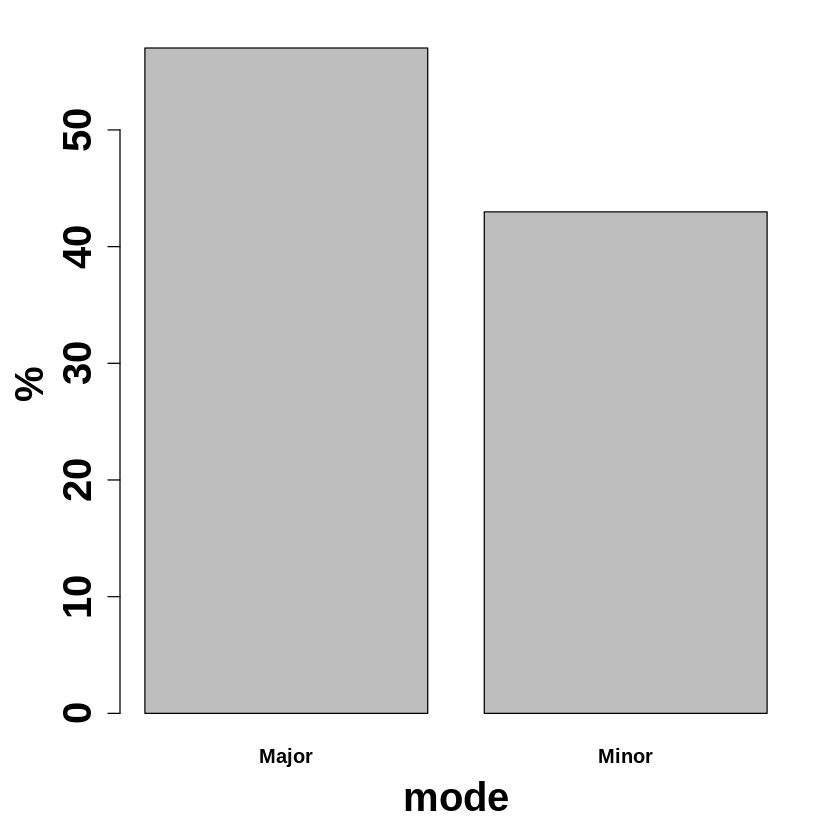

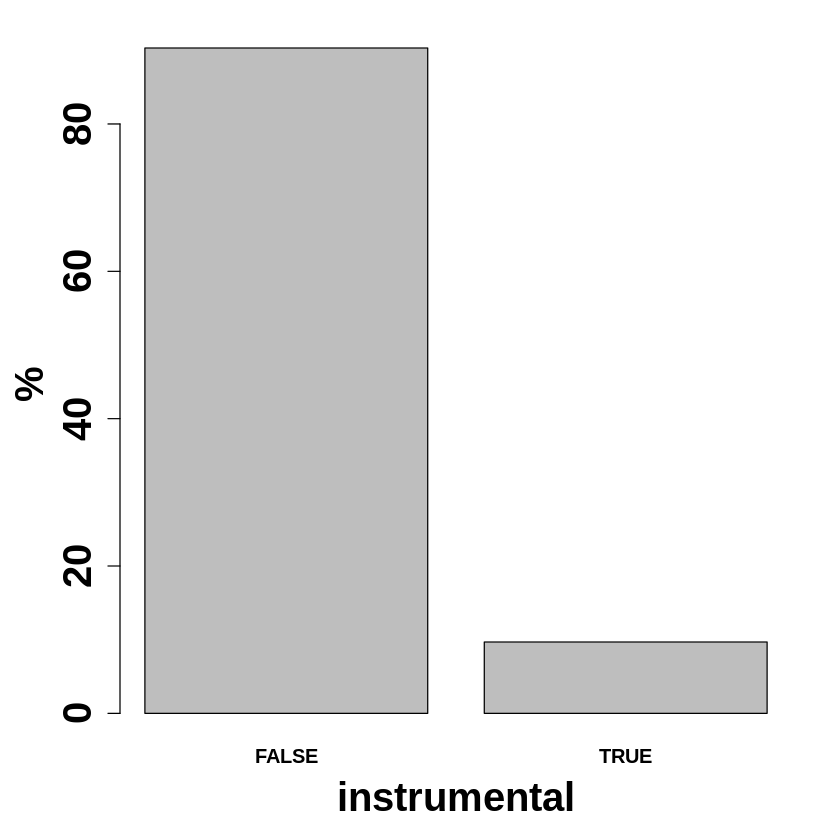

In [ ]:
# Function for consistent styling
make_barplot <- function(data, var_name) {
 freq_table <- table(data)
 percentages = prop.table(freq_table) * 100
 par(mar=c(5,5,2,2))  # Bottom, left, top, right margins
 barplot(percentages,
         ylab = "%",
         xlab = var_name,
         cex.axis = 2,     # Axis text size
         cex.lab = 2,      # Label text size
         font.axis = 2,    # Bold axis text
         font.lab = 2)     # Bold labels
}

# Create plots
make_barplot(musical_attr_df$key, "key")
make_barplot(musical_attr_df$mode, "mode")
make_barplot(musical_attr_df$instrumental, "instrumental")

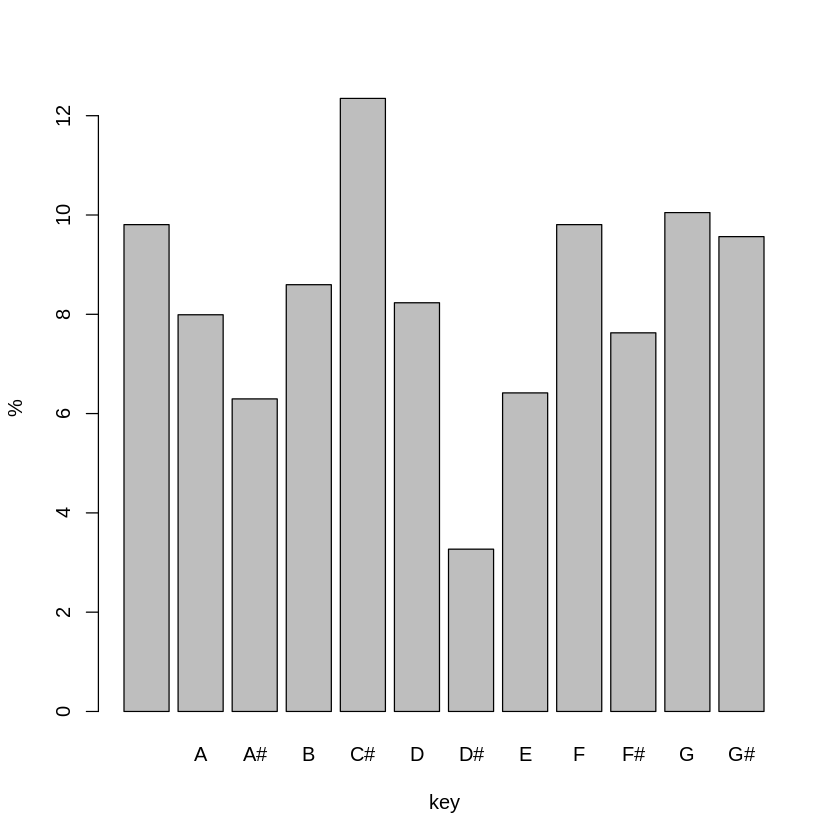

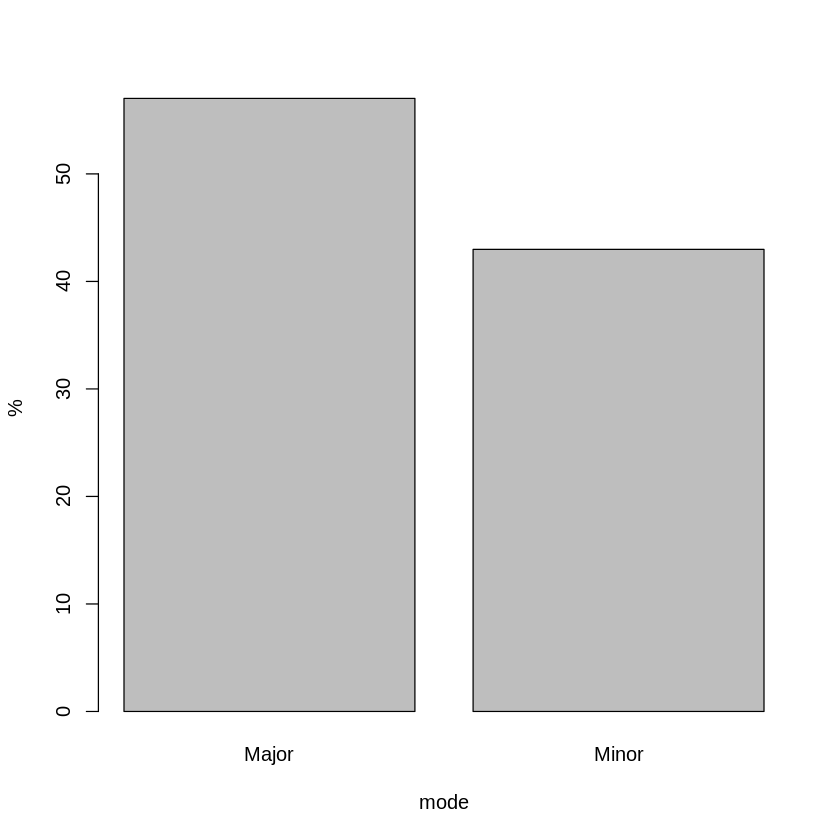

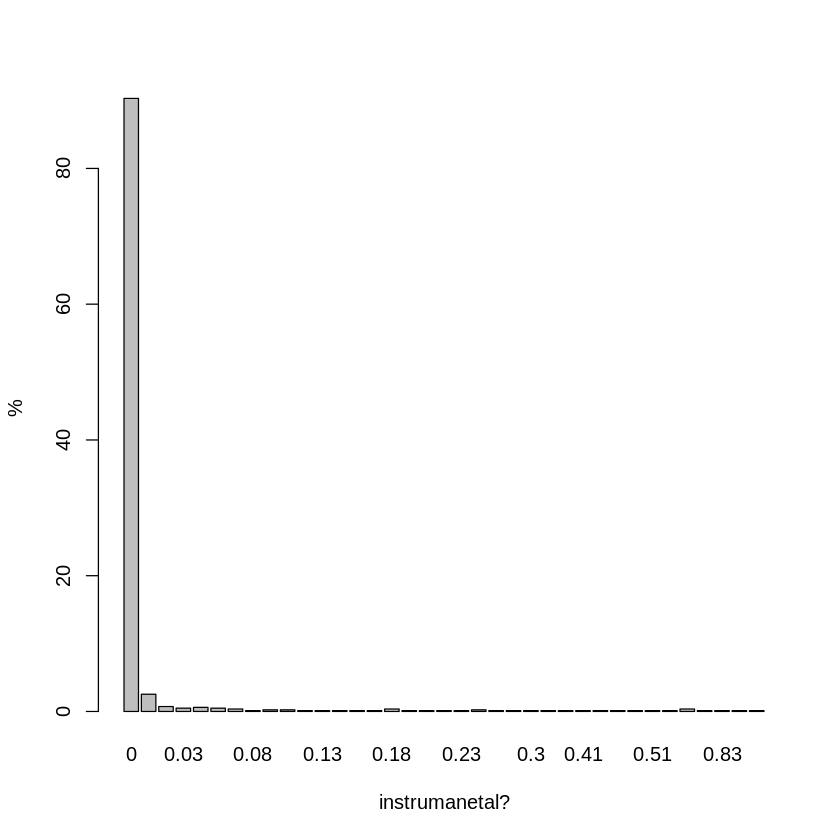

In [ ]:
freq_table <- table(musical_attr_df$key)
percentages = prop.table(freq_table) * 100

barplot(percentages,ylab ="%",xlab = "key")

freq_table <- table(musical_attr_df$mode)
percentages = prop.table(freq_table) * 100

barplot(percentages,ylab ="%",xlab = "mode")

freq_table <- table(musical_attr_df$instrumental)
percentages = prop.table(freq_table) * 100

barplot(percentages,ylab ="%", xlab = "instrumanetal?")

Let's drop the the rows we don't care about and look at the correlations

In [ ]:
clean_mattr_df = musical_attr_df[c("bpm","key","mode","danceability","valence",
                                          "energy","sqrt_acousticness", "sqrt_liveness",
                                          "sqrt_speechiness","instrumental")]
str(clean_mattr_df)

'data.frame':	826 obs. of  10 variables:
 $ bpm              : num  0.426 0.191 0.518 0.745 0.56 ...
 $ key              : Factor w/ 12 levels "","A","A#","B",..: 4 5 9 2 2 5 9 9 5 6 ...
 $ mode             : Factor w/ 2 levels "Major","Minor": 1 1 1 1 2 1 2 1 2 2 ...
 $ danceability     : num  0.8 0.71 0.51 0.55 0.65 0.92 0.67 0.67 0.85 0.81 ...
 $ valence          : num  0.89 0.61 0.32 0.58 0.23 0.66 0.83 0.26 0.22 0.56 ...
 $ energy           : num  0.83 0.74 0.53 0.72 0.8 0.58 0.76 0.71 0.62 0.48 ...
 $ sqrt_acousticness: num  0.557 0.265 0.412 0.332 0.374 ...
 $ sqrt_liveness    : num  0.283 0.316 0.557 0.332 0.332 ...
 $ sqrt_speechiness : num  0.2 0.2 0.245 0.387 0.245 ...
 $ instrumental     : Factor w/ 2 levels "FALSE","TRUE": 1 1 1 1 2 1 1 1 1 1 ...


In [ ]:
# For numeric columns only

# With different correlation methods
# Options: "pearson" (default), "spearman", "kendall"
correlation_matrix <- cor(clean_mattr_df[sapply(clean_mattr_df, is.numeric)],
                        method = "spearman")

In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



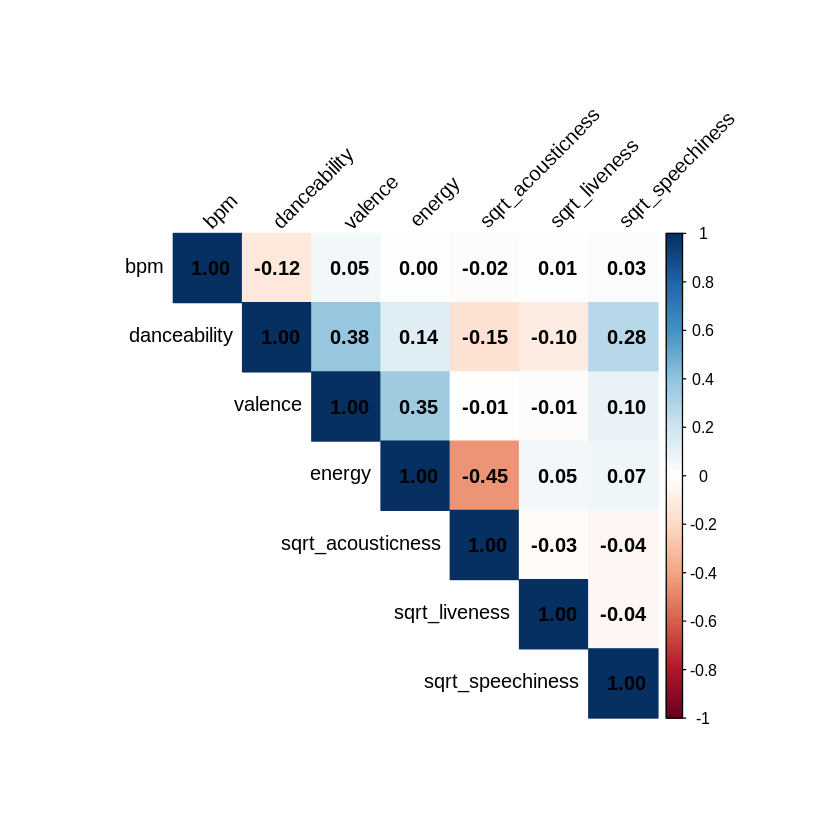

In [ ]:
library(corrplot)

# Create visualization
corrplot(correlation_matrix,
         method = "color",     # Show colors
         type = "upper",       # Show only upper triangle
         addCoef.col = "black", # Add correlation coefficients
         tl.col = "black",     # Text label color
         tl.srt = 45)          # Text label rotation

# Add your work below this

In [ ]:
#df_test = df %>%
#    separate_longer_delim(artist_name, delim = ", ") %>%
#    mutate(value = 1) %>%
#    pivot_wider(names_from = artist_name,
#             values_from = value,
#            values_fill = 0)
#df_test

In [ ]:
#dummy <- dummyVars(" ~ artist_name", data = df_test)
#encoded <- predict(dummy, df_test)
#encoded

In [ ]:
# If values are comma-separated
#library(caret)
#artists <- df$artist_name
#dummy <- dummyVars(" ~ artist_name", data = df)
#encoded <- predict(dummy, df)
#encoded



**Comparing Distributions of Years **




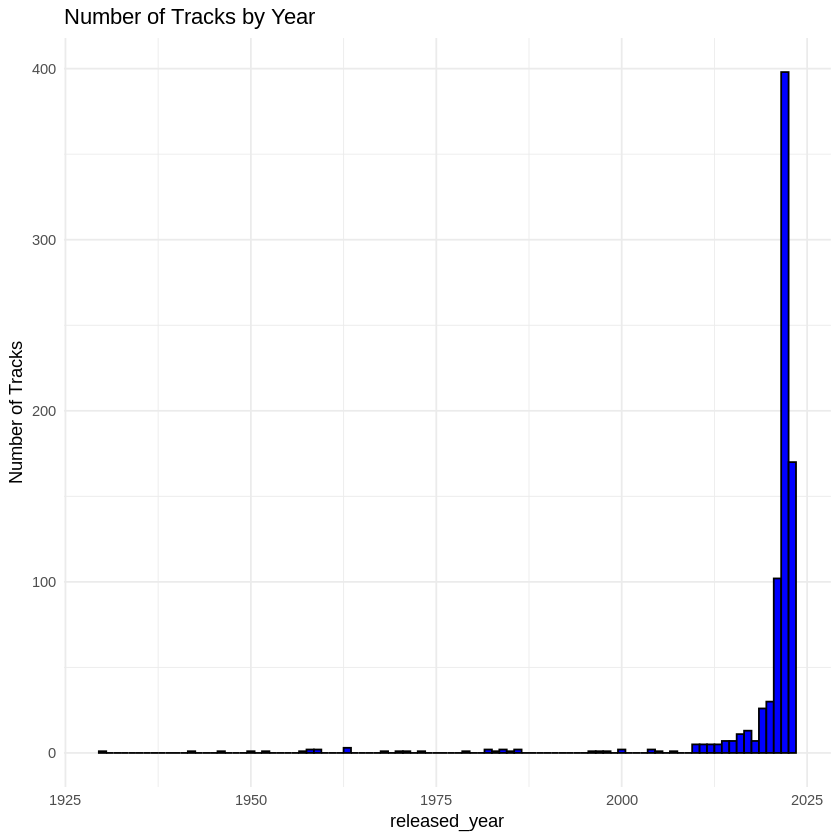

In [ ]:
#Histogram for frequency of songs by year

library(ggplot2)

# Plot histogram
ggplot(df, aes(x = released_year)) +
  geom_histogram(binwidth = 1, color = "black", fill = "blue") +
  labs(
    title = "Number of Tracks by Year",
    x = "released_year",
    y = "Number of Tracks"
  ) +
  theme_minimal()

In [ ]:
#grouping the df by year

years <-df["released_year"]


ye <- unique( df$released_year )

df_1982 <- subset(df, released_year=='1982')
df_2007 <- subset(df, released_year=='2007')
df_2008 <- subset(df, released_year=='2008')
df_2009 <- subset(df, released_year=='2009')
df_2010 <- subset(df, released_year=='2010')
df_2011 <- subset(df, released_year=='2011')
df_2012 <- subset(df, released_year=='2012')
df_2013 <- subset(df, released_year=='2013')
df_2014 <- subset(df, released_year=='2014')
df_2015 <- subset(df, released_year=='2015')
df_2016 <- subset(df, released_year=='2016')
df_2017 <- subset(df, released_year=='2017')
df_2018 <- subset(df, released_year=='2018')
df_2019 <- subset(df, released_year=='2019')
df_2020 <- subset(df, released_year=='2020')
df_2021 <- subset(df, released_year=='2021')
df_2022 <- subset(df, released_year=='2022')
df_2023 <- subset(df, released_year=='2023')

#df_2022
#Looking at comparing 2021 2022 and 2023 since they have the most tracks


In [ ]:
#comparing distributions for different years
df_2021$bpm <- as.numeric(as.character(df_2021$bpm))
df_2022$bpm <- as.numeric(as.character(df_2022$bpm))
df_2023$bpm <- as.numeric(as.character(df_2023$bpm))

#hypothesis
#testing bpm by year
ks.test(df_2023$bpm,df_2022$bpm,alternative ="two.sided")
ks.test(df_2021$bpm,df_2022$bpm,alternative ="two.sided")
ks.test(df_2023$bpm,df_2021$bpm,alternative ="two.sided")

Warning message in ks.test.default(df_2023$bpm, df_2022$bpm, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  df_2023$bpm and df_2022$bpm
D = 0.11268, p-value = 0.09711
alternative hypothesis: two-sided


Warning message in ks.test.default(df_2021$bpm, df_2022$bpm, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  df_2021$bpm and df_2022$bpm
D = 0.081486, p-value = 0.6537
alternative hypothesis: two-sided


Warning message in ks.test.default(df_2023$bpm, df_2021$bpm, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  df_2023$bpm and df_2021$bpm
D = 0.1098, p-value = 0.4257
alternative hypothesis: two-sided


In [ ]:
ks.test(df_2023$danceability,df_2021$danceability,alternative ="two.sided")

Warning message in ks.test.default(df_2023$bpm, df_2021$bpm, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  df_2023$bpm and df_2021$bpm
D = 0.1098, p-value = 0.4257
alternative hypothesis: two-sided


In [ ]:
#testing number of streams distributions to years
ks.test(df_2021$streams,df_2022$streams,alternative ="two.sided")
ks.test(df_2022$streams,df_2023$streams,alternative ="two.sided")
ks.test(df_2021$streams,df_2023$streams,alternative ="two.sided")

Warning message in ks.test.default(df_2021$streams, df_2022$streams, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  df_2021$streams and df_2022$streams
D = 0.44783, p-value = 1.438e-14
alternative hypothesis: two-sided


Warning message in ks.test.default(df_2022$streams, df_2023$streams, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  df_2022$streams and df_2023$streams
D = 0.43402, p-value < 2.2e-16
alternative hypothesis: two-sided


Warning message in ks.test.default(df_2021$streams, df_2023$streams, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  df_2021$streams and df_2023$streams
D = 0.76078, p-value < 2.2e-16
alternative hypothesis: two-sided


In [ ]:
ks.test(df_2021$streams,df_2023$streams,alternative ="two.sided")

Warning message in ks.test.default(df_2021$streams, df_2023$streams, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  df_2021$streams and df_2023$streams
D = 0.76078, p-value < 2.2e-16
alternative hypothesis: two-sided


# Comparing median number of streams by year

In [ ]:
# Create a data frame with streams and year as columns
streams_df <- data.frame(
  streams = c(df_2021$streams, df_2022$streams, df_2023$streams),
  year = factor(rep(c("2021", "2022", "2023"),
                    times = c(length(df_2021$streams),
                              length(df_2022$streams),
                              length(df_2023$streams))))
)

# Perform Kruskal-Wallis test
kruskal_test <- kruskal.test(streams ~ year, data = streams_df)
print(kruskal_test)





	Kruskal-Wallis rank sum test

data:  streams by year
Kruskal-Wallis chi-squared = 182.07, df = 2, p-value < 2.2e-16



In [ ]:
# Conovers test

# Install if it's your first time to run
install.packages("DescTools", repos = "https://cloud.r-project.org")

system("apt-get update")
system("apt-get install -y libmagick++-dev")

# Load the library
library(DescTools)

ConoverTest(streams_df$streams,streams_df$year)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘rootSolve’, ‘e1071’, ‘lmom’, ‘mvtnorm’, ‘expm’, ‘Exact’, ‘gld’





 Conover's test of multiple comparisons : holm  

          mean.rank.diff   pval    
2022-2021      -162.0695 <2e-16 ***
2023-2021      -321.2461 <2e-16 ***
2023-2022      -159.1766 <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


# GOF Tests

In [ ]:
names(df)

[1] "track_name"           "artist_name"          "artist_count"        
 [4] "released_year"        "released_month"       "released_day"        
 [7] "in_spotify_playlists" "in_spotify_charts"    "streams"             
[10] "in_apple_playlists"   "in_apple_charts"      "in_deezer_playlists" 
[13] "in_deezer_charts"     "in_shazam_charts"     "bpm"                 
[16] "key"                  "mode"                 "danceability"        
[19] "valence"              "energy"               "acousticness"        
[22] "instrumentalness"     "liveness"             "speechiness"

In [ ]:
ks.test(df$danceability,"pbeta",shape1=5.92619, shape2=2.79314)

Warning message in ks.test.default(df$danceability, "pbeta", shape1 = 5.92619, shape2 = 2.79314):
“ties should not be present for the one-sample Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  df$danceability
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided


# Vaishnavi Code

In [ ]:
# Categorize danceability into 3 groups: Low, Medium, High
combined_df$danceability_cat <- cut(combined_df$danceability,
                                    breaks = quantile(combined_df$danceability, probs = c(0, 0.33, 0.67, 1), na.rm = TRUE),
                                    labels = c("Low", "Medium", "High"),
                                    include.lowest = TRUE)

str(combined_df)



'data.frame':	826 obs. of  25 variables:
 $ track_name          : chr  "Seven (feat. Latto) (Explicit Ver.)" "LALA" "vampire" "Cruel Summer" ...
 $ artist_name         : chr  "Latto, Jung Kook" "Myke Towers" "Olivia Rodrigo" "Taylor Swift" ...
 $ artist_count        : int  2 1 1 1 1 2 2 1 1 2 ...
 $ released_year       : int  2023 2023 2023 2019 2023 2023 2023 2023 2023 2023 ...
 $ released_month      : int  7 3 6 8 5 6 3 7 5 3 ...
 $ released_day        : int  14 23 30 23 18 1 16 7 15 17 ...
 $ bpm                 : num  0.426 0.191 0.518 0.745 0.56 ...
 $ key                 : Factor w/ 12 levels "","A","A#","B",..: 4 5 9 2 2 5 9 9 5 6 ...
 $ mode                : Factor w/ 2 levels "Major","Minor": 1 1 1 1 2 1 2 1 2 2 ...
 $ danceability        : num  0.8 0.71 0.51 0.55 0.65 0.92 0.67 0.67 0.85 0.81 ...
 $ valence             : num  0.89 0.61 0.32 0.58 0.23 0.66 0.83 0.26 0.22 0.56 ...
 $ energy              : num  0.83 0.74 0.53 0.72 0.8 0.58 0.76 0.71 0.62 0.48 ...
 $ sqrt_acousti


   Low Medium   High 
   283    278    265 

In [ ]:
# Kruskal-Wallis Test for danceability categories
kruskal_test <- kruskal.test(streams ~ danceability_cat, data = combined_df)
print(kruskal_test)

# Interpret p-value:
# p-value < 0.05 indicates significant differences between groups.



	Kruskal-Wallis rank sum test

data:  streams by danceability_cat
Kruskal-Wallis chi-squared = 2.9043, df = 2, p-value = 0.2341



In [ ]:
spearman_corr <- cor.test(combined_df$danceability, combined_df$streams, method = "spearman")
print(spearman_corr)


Warning message in cor.test.default(combined_df$danceability, combined_df$streams, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  combined_df$danceability and combined_df$streams
S = 98419403, p-value = 0.1696
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.04783396 



In [ ]:
shapiro.test(combined_df$streams)


	Shapiro-Wilk normality test

data:  combined_df$streams
W = 0.80803, p-value < 2.2e-16


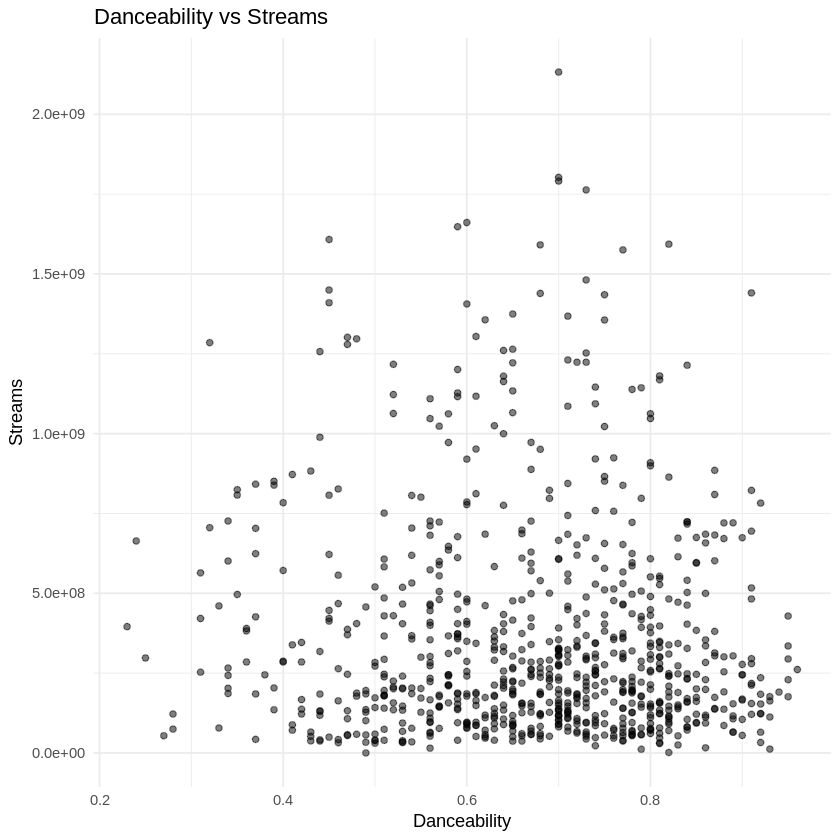

In [ ]:
ggplot(combined_df, aes(x = danceability, y = streams)) +
  geom_point(alpha = 0.5) +
  labs(title = "Danceability vs Streams", x = "Danceability", y = "Streams") +
  theme_minimal()


Energy

In [ ]:
# Categorize energy into Low, Medium, and High
combined_df$energy_cat <- cut(combined_df$energy,
                              breaks = quantile(combined_df$energy, probs = c(0, 0.33, 0.67, 1), na.rm = TRUE),
                              labels = c("Low", "Medium", "High"),
                              include.lowest = TRUE)

# Verify the categories
str(combined_df)


'data.frame':	826 obs. of  27 variables:
 $ track_name          : chr  "Seven (feat. Latto) (Explicit Ver.)" "LALA" "vampire" "Cruel Summer" ...
 $ artist_name         : chr  "Latto, Jung Kook" "Myke Towers" "Olivia Rodrigo" "Taylor Swift" ...
 $ artist_count        : int  2 1 1 1 1 2 2 1 1 2 ...
 $ released_year       : int  2023 2023 2023 2019 2023 2023 2023 2023 2023 2023 ...
 $ released_month      : int  7 3 6 8 5 6 3 7 5 3 ...
 $ released_day        : int  14 23 30 23 18 1 16 7 15 17 ...
 $ bpm                 : num  0.426 0.191 0.518 0.745 0.56 ...
 $ key                 : Factor w/ 12 levels "","A","A#","B",..: 4 5 9 2 2 5 9 9 5 6 ...
 $ mode                : Factor w/ 2 levels "Major","Minor": 1 1 1 1 2 1 2 1 2 2 ...
 $ danceability        : num  0.8 0.71 0.51 0.55 0.65 0.92 0.67 0.67 0.85 0.81 ...
 $ valence             : num  0.89 0.61 0.32 0.58 0.23 0.66 0.83 0.26 0.22 0.56 ...
 $ energy              : num  0.83 0.74 0.53 0.72 0.8 0.58 0.76 0.71 0.62 0.48 ...
 $ sqrt_acousti

In [ ]:
# Kruskal-Wallis test for energy categories
kruskal_test_energy <- kruskal.test(streams ~ energy_cat, data = combined_df)
print(kruskal_test_energy)



	Kruskal-Wallis rank sum test

data:  streams by energy_cat
Kruskal-Wallis chi-squared = 3.8687, df = 2, p-value = 0.1445



In [ ]:
spearman_corr <- cor.test(combined_df$energy_cat, combined_df$streams, method = "spearman")
print(spearman_corr)

ERROR: Error in cor.test.default(combined_df$energy_cat, combined_df$streams, : 'x' must be a numeric vector


# Parametric ANOVA test followed by t=ukeys if anova is significant

In [ ]:
# Example: ANOVA for streams across danceability categories
anova_model <- aov(streams ~ danceability_cat, data = combined_df)
summary(anova_model)


                  Df    Sum Sq   Mean Sq F value Pr(>F)  
danceability_cat   2 8.366e+17 4.183e+17   3.529 0.0298 *
Residuals        823 9.756e+19 1.185e+17                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
# Tukey's HSD test
tukey_test <- TukeyHSD(anova_model)
print(tukey_test)


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = streams ~ danceability_cat, data = combined_df)

$danceability_cat
                 diff        lwr      upr     p adj
Medium-Low   -5345132  -73979860 63289597 0.9817365
High-Low    -70258888 -139085692 -1432084 0.0441608
High-Medium -64913756 -134170839  4343326 0.0716365



In [ ]:
# Subset relevant columns for Friedman Test
#dont include mode or isntrumental since they are factors. but can convert
#key into numeric

combined_df$key_numeric <- as.numeric(as.factor(combined_df$key))

friedman_df <- combined_df[, c("track_name", "bpm","key_numeric",
 "danceability", "valence", "energy", "sqrt_acousticness",
 "sqrt_liveness","sqrt_speechiness")]



# Exclude the track_name column
friedman_matrix <- as.matrix(friedman_df[, -1])

# Friedman Test
friedman_test <- friedman.test(friedman_matrix)
print(friedman_test)



	Friedman rank sum test

data:  friedman_matrix
Friedman chi-squared = 3249.9, df = 7, p-value < 2.2e-16



In [ ]:
pairwise.wilcox.test(
  x = c(friedman_df$bpm,friedman_df$key_numeric ,friedman_df$danceability, friedman_df$valence,
  friedman_df$energy, friedman_df$sqrt_acousticness, friedman_df$sqrt_liveness, friedman_df$sqrt_speechiness),
  g = rep(c("bpm", "key_numeric", "danceability", "valence", "energy", "sqrt_acousticness",
  "sqrt_liveness","sqrt_speechiness"),
  each = nrow(friedman_df)),
  p.adjust.method = "bonferroni"
)




	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  c(friedman_df$bpm, friedman_df$key_numeric, friedman_df$danceability, friedman_df$valence, friedman_df$energy, friedman_df$sqrt_acousticness, friedman_df$sqrt_liveness, friedman_df$sqrt_speechiness) and rep(c("bpm", "key_numeric", "danceability", "valence", "energy", "sqrt_acousticness", "sqrt_liveness", "sqrt_speechiness"), each = nrow(friedman_df)) 

                  bpm     danceability energy  key_numeric sqrt_acousticness
danceability      < 2e-16 -            -       -           -                
energy            < 2e-16 0.0044       -       -           -                
key_numeric       < 2e-16 < 2e-16      < 2e-16 -           -                
sqrt_acousticness 0.1724  < 2e-16      < 2e-16 < 2e-16     -                
sqrt_liveness     1.0000  < 2e-16      < 2e-16 < 2e-16     0.0807           
sqrt_speechiness  < 2e-16 < 2e-16      < 2e-16 < 2e-16     < 2e-16          
valence           

In [ ]:
install.packages("mblm")
library(mblm)

theil_sen_danceability <- mblm(streams ~ danceability, data = combined_df)
summary(theil_sen_danceability)

theil_sen_valence <- mblm(streams ~ valence, data = combined_df)
summary(theil_sen_valence)

theil_sen_key <- mblm(streams ~ key_numeric, data = combined_df)
summary(theil_sen_key)

theil_sen_speechiness <- mblm(streams ~ sqrt_speechiness, data = combined_df)
summary(theil_sen_speechiness)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Call:
mblm(formula = streams ~ danceability, dataframe = combined_df)

Residuals:
       Min         1Q     Median         3Q        Max 
-243676873 -104582636   12480274  243278686 1899129371 

Coefficients:
              Estimate       MAD V value Pr(>|V|)    
(Intercept)  268117086 452870734  271419  < 2e-16 ***
danceability -49872349 631527773  148501  0.00116 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 369300000 on 824 degrees of freedom



Call:
mblm(formula = streams ~ valence, dataframe = combined_df)

Residuals:
       Min         1Q     Median         3Q        Max 
-241469867 -115707743    -373318  231802542 1888516944 

Coefficients:
             Estimate       MAD V value Pr(>|V|)    
(Intercept) 263167273 221184369  321825  < 2e-16 ***
valence     -32793906 355910700  148360  0.00108 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 365300000 on 824 degrees of freedom



Call:
mblm(formula = streams ~ key_numeric, dataframe = combined_df)

Residuals:
       Min         1Q     Median         3Q        Max 
-241281078  -98341102   18835004  244969619 1884092963 

Coefficients:
             Estimate       MAD V value Pr(>|V|)    
(Intercept) 251722353 169600409  331214  < 2e-16 ***
key_numeric  -3479504  21906926  150692  0.00341 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 371400000 on 824 degrees of freedom



Call:
mblm(formula = streams ~ sqrt_speechiness, dataframe = combined_df)

Residuals:
       Min         1Q     Median         3Q        Max 
-246634054 -105342368   11455772  237358255 1885698996 

Coefficients:
                   Estimate        MAD V value Pr(>|V|)    
(Intercept)       269915670  240894521  307127  < 2e-16 ***
sqrt_speechiness -116394270  658396076  142778 4.47e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 368300000 on 824 degrees of freedom


In [ ]:
# Combine results into a summary table
results <- data.frame(
  Predictor = c("Danceability", "Valence", "Key", "Speechiness"),
  Estimate = c(
    coef(theil_sen_danceability)["danceability"],
    coef(theil_sen_valence)["valence"],
    coef(theil_sen_key)["key_numeric"],
    coef(theil_sen_speechiness)["sqrt_speechiness"]
  ),
  P_Value = c(
    summary(theil_sen_danceability)$coefficients[2, 4],
    summary(theil_sen_valence)$coefficients[2, 4],
    summary(theil_sen_key)$coefficients[2, 4],
    summary(theil_sen_speechiness)$coefficients[2, 4]
  )
)

print(results)


                    Predictor   Estimate      P_Value
danceability     Danceability  -49872349 1.164987e-03
valence               Valence  -32793906 1.083590e-03
key_numeric               Key   -3479504 3.412689e-03
sqrt_speechiness  Speechiness -116394270 4.471321e-05


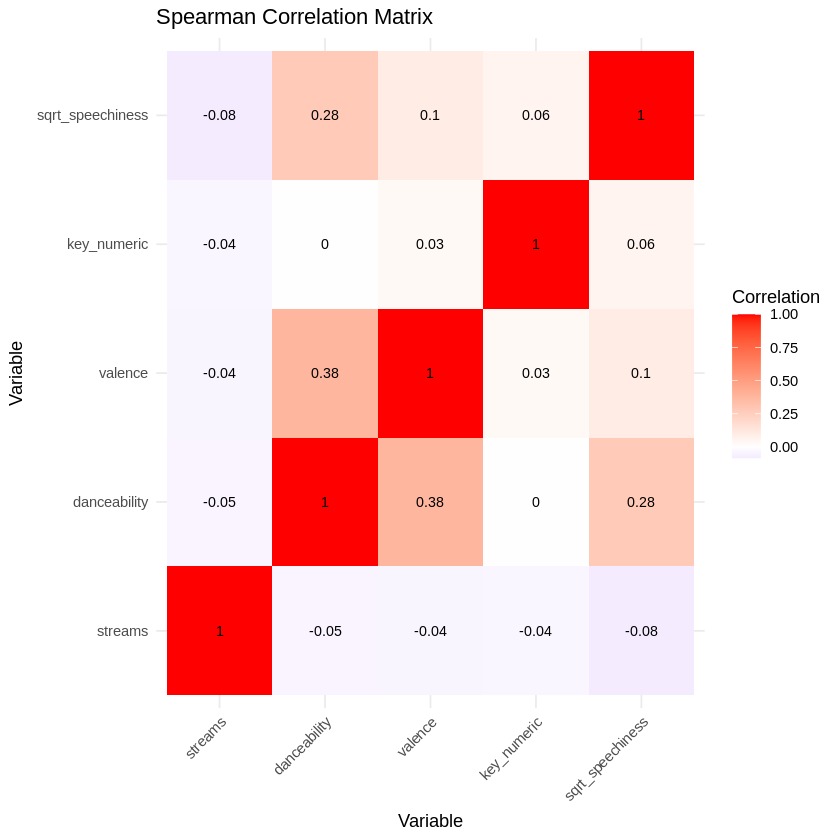

In [ ]:
ggplot(cor_melt, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  geom_text(aes(label = round(value, 2)), color = "black", size = 3) +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0) +
  labs(title = "Spearman Correlation Matrix", x = "Variable", y = "Variable", fill = "Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [ ]:
interaction_model <- lm(streams ~ danceability * valence, data = combined_df)
summary(interaction_model)



Call:
lm(formula = streams ~ danceability * valence, data = combined_df)

Residuals:
       Min         1Q     Median         3Q        Max 
-428639859 -231830847 -114102935  118102261 1777956722 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           569499067  125931242   4.522 7.02e-06 ***
danceability         -252996264  194006491  -1.304    0.193    
valence              -262596904  263185066  -0.998    0.319    
danceability:valence  283074047  378135533   0.749    0.454    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 344700000 on 822 degrees of freedom
Multiple R-squared:  0.007581,	Adjusted R-squared:  0.003959 
F-statistic: 2.093 on 3 and 822 DF,  p-value: 0.09967
